In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import numpy as np
import pandas as pd
import datetime as dt


In [1317]:
def scatter_graph(test_df, title):
    x = test_df['date']
    y = test_df['sold']
    plt.scatter(x,y)
    plt.title(title,fontsize=25)
    plt.legend(['quantity'], loc='upper center')
    plt.xlabel('year', fontsize=20)

    plt.ylabel('qty sold', fontsize=20)
    plt.show()

In [1318]:
#engine = create_engine("sqlite:///RestaurantDB.sqlite")
engine = create_engine("sqlite:///RestaurantDBtimedate.sqlite")

Base = automap_base()
Base.prepare(engine, reflect=True)

In [1319]:
Base.classes.keys()

['sales']

In [1320]:
Sales = Base.classes.sales

In [1321]:
session = Session(engine)

In [1322]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('sales')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
item VARCHAR(255)
price INTEGER
sold INTEGER
tot_value FLOAT
month INTEGER
year INTEGER
date VARCHAR(255)


In [88]:
def sql_item(item):
    query = [Sales.item, Sales.sold, Sales.date]
    item_query = session.query(*query).\
    filter_by(item=item).all()
    item_df = pd.DataFrame(item_query, columns=['item', 'sold', 'date'])
    item_df['date'] = pd.to_datetime(item_df['date'], format='%Y/%m/%d')
    item_df = item_df.sort_values(by=['date'])
    
    
    #item_df = pd.DataFrame(item_query, columns=['item', 'sold', 'month', 'year', 'date']).\
    #    sort_values(by=['date'])
    return item_df

In [89]:
query2 = [Sales.item, func.sum(Sales.sold)]

In [90]:
total_sold = session.query(*query2).\
    group_by(Sales.item).all()
total_sold_df = pd.DataFrame(total_sold, columns=['item', 'quantity']).sort_values(by='quantity', ascending=False).reset_index(drop=True)
total_sold_df.head(20)

item  quantity
0           Garlic Naan     15351
1        Butter Chicken     10675
2            Plain Naan      7628
3     Yellow Rice Large      5590
4         Pappodums x 4      4847
5      White Rice Large      3451
6          Onion Bhajia      3308
7       Paper Carry Bag      2672
8          BYO Per Head      2651
9              Parathas      2632
10   Yellow Rice Medium      2620
11                Raita      2417
12        Reuserble Bag      2359
13            Chapattis      2004
14           Rogan Josh      1938
15           Lamb Korma      1756
16           Can drinks      1706
17        Chicken Korma      1643
18          Curry Puffs      1597
19    White Rice Medium      1576

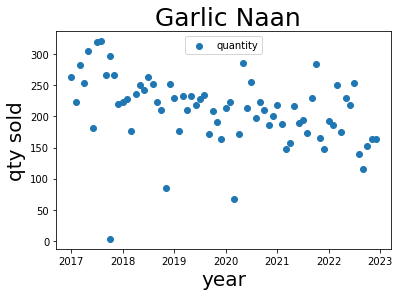

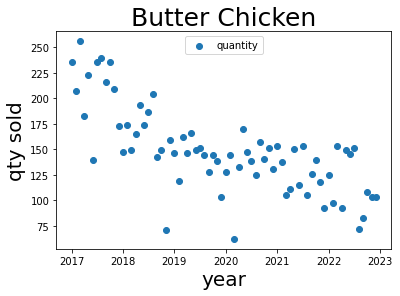

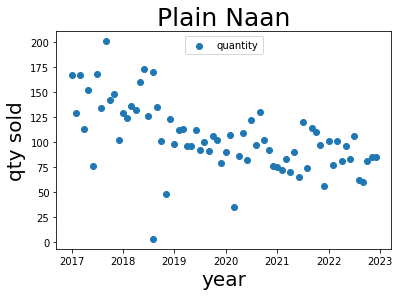

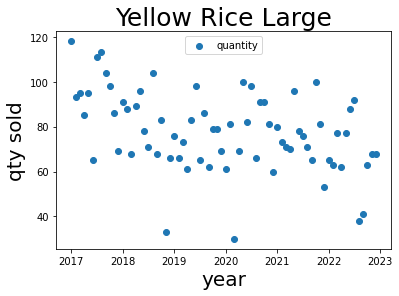

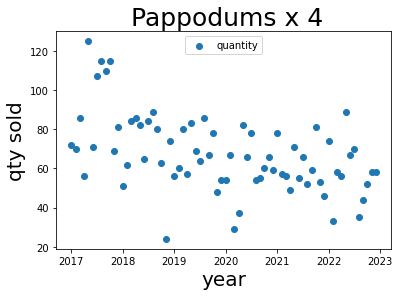

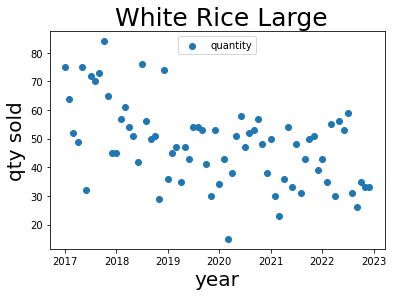

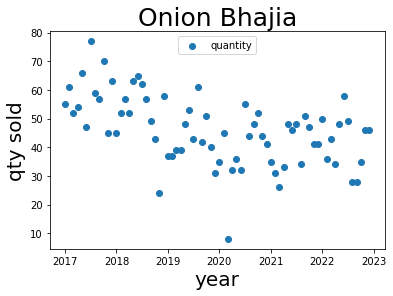

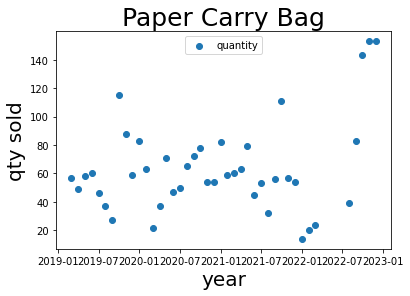

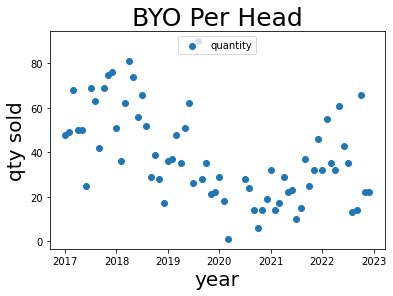

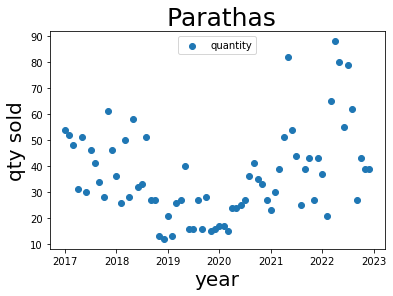

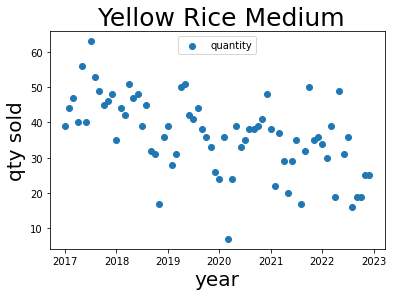

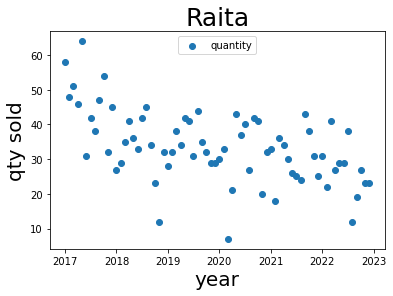

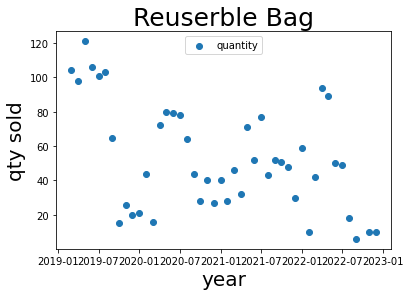

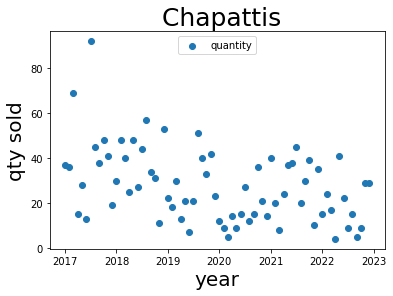

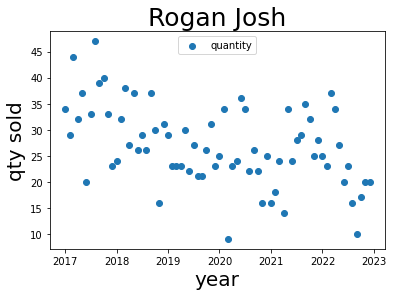

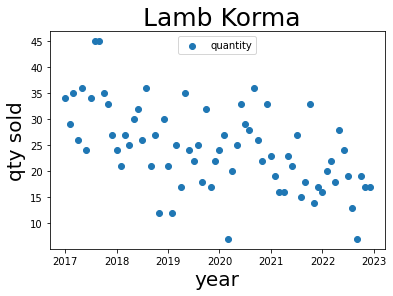

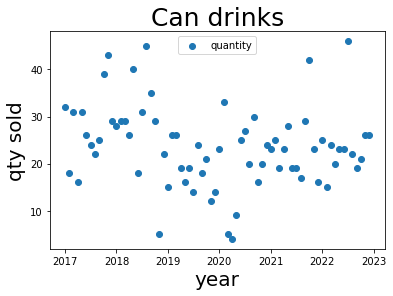

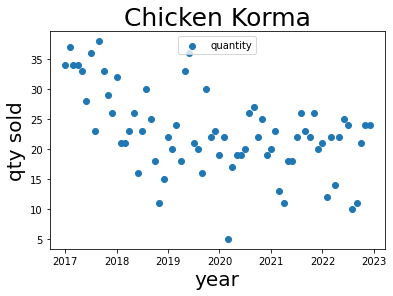

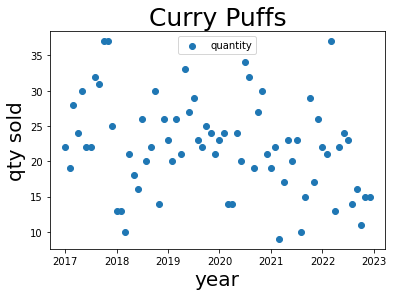

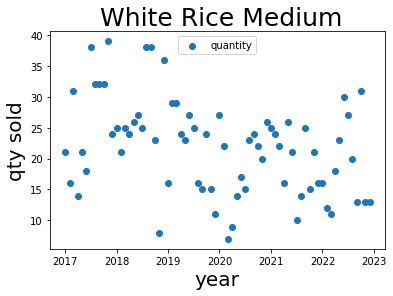

In [105]:
for i in range(20):
    item = total_sold_df.loc[i,'item']
    item_df = sql_item(item)
    scatter_graph(item_df, item)
   

In [92]:
session.close()

In [294]:
item_df = sql_item("Butter Chicken")

In [312]:
item_df.head()

item  sold       date
0  Butter Chicken   236 2017-01-01
1  Butter Chicken   207 2017-02-01
2  Butter Chicken   256 2017-03-01
3  Butter Chicken   183 2017-04-01
4  Butter Chicken   223 2017-05-01

In [289]:
test_df = {}

In [909]:
test_df = item_df

In [910]:
test_df = test_df.rename(columns={'sold':'y'})
test_df = test_df.set_index('date')
test_df = test_df.asfreq('MS')
#test_df = test_df.sort_index()

In [911]:
test_df.head(5)

item    y
date                           
2017-01-01  Butter Chicken  236
2017-02-01  Butter Chicken  207
2017-03-01  Butter Chicken  256
2017-04-01  Butter Chicken  183
2017-05-01  Butter Chicken  223

In [211]:
#test_df = test_df.groupby(by=[test_df.index.month])

In [268]:
test_df['Month'] = test_df['date'].dt.month


In [907]:

test_df = test_df.groupby(lambda x: x.month)

In [327]:
import calendar

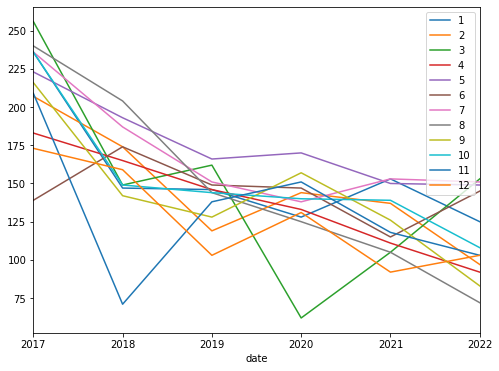

In [328]:
fig, ax = plt.subplots(figsize=(8,6))
for label, test_df in test_df.groupby(lambda x: x.month):
    test_df.y.plot(kind="line", ax=ax, label=label)
plt.legend()

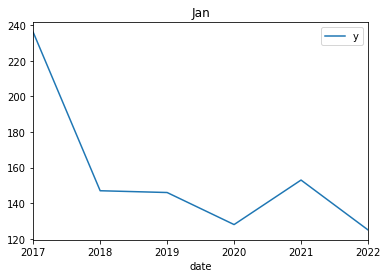

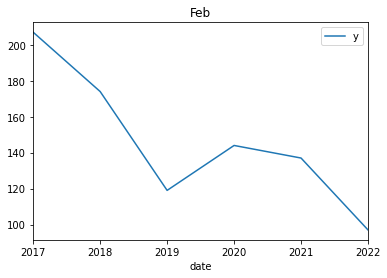

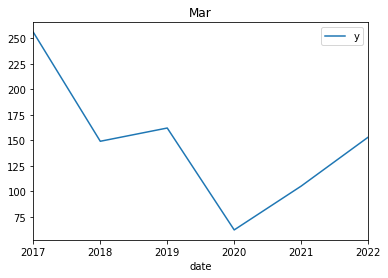

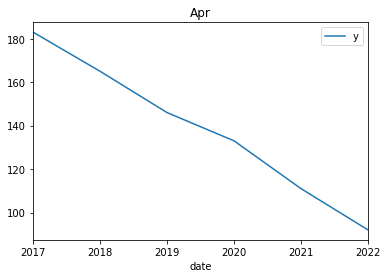

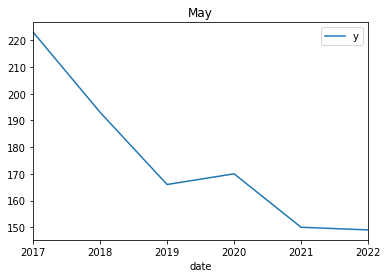

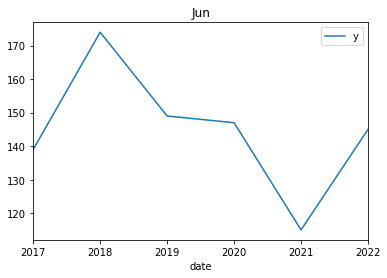

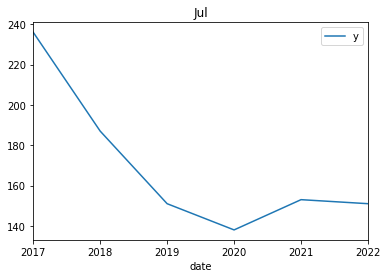

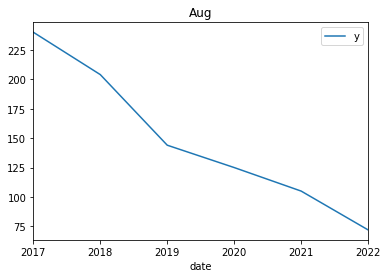

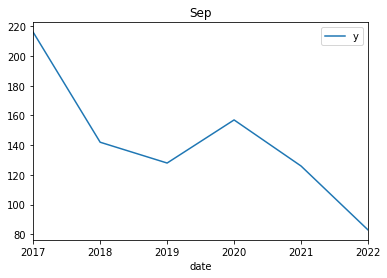

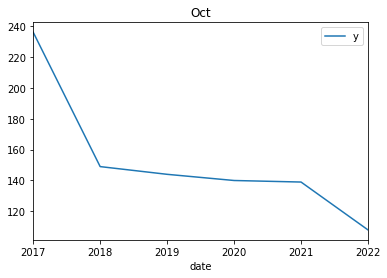

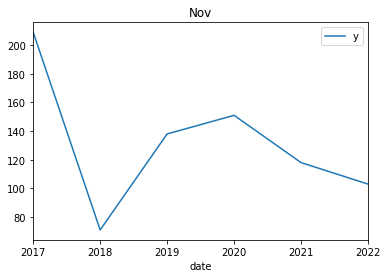

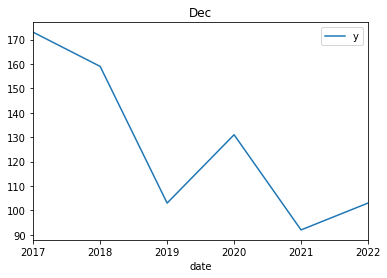

In [342]:

for key, group in test_df:
    month = str(calendar.month_abbr[key]) 
    group.plot()
    title_str = month + ' - ' + 'Butter Chicken'
    plt.title(title_str)
    plt.title(month)

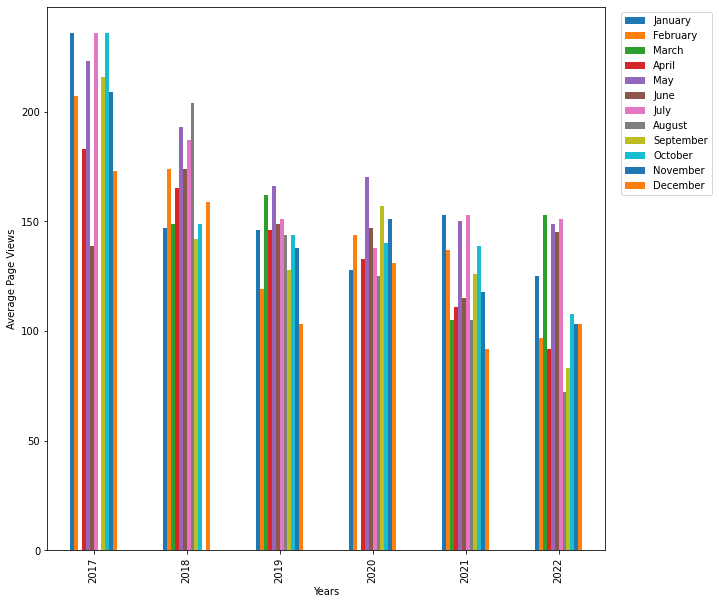

In [220]:
line_plot = test_df.y[(test_df.y > test_df.y.quantile(0.025)) & (test_df.y < test_df.y.quantile(0.975))]

fig, ax = plt.subplots(figsize=(10,10))
bar_plot = line_plot.groupby([line_plot.index.year, line_plot.index.month]).mean().unstack()
bar_plot.plot(ax = ax, kind='bar')
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')

handles, labels = ax.get_legend_handles_labels()
new_labels = [dt.date(1900, int(monthinteger), 1).strftime('%B') for monthinteger in labels]
ax.legend(handles = handles, labels = new_labels, loc = 'upper left', bbox_to_anchor = (1.02, 1))

plt.show()

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster
import warnings

In [ ]:
for i in range(20):
    item = total_sold_df.loc[i,'item']
    item_df = sql_item(item)
    ml_engine(item_df, item)

In [1276]:
sql_item('Plain Naan').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   item    73 non-null     object        
 1   sold    73 non-null     int64         
 2   date    73 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.3+ KB


In [1260]:
for i in range(20):
    item = total_sold_df.loc[i,'item']
    item_df = sql_item(item)
    print(item)
    print(item_df.shape)

 Garlic Naan
(73, 3)
Butter Chicken
(72, 3)
Plain Naan
(73, 3)
Yellow Rice Large
(72, 3)
 Pappodums x 4
(72, 3)
 White Rice Large
(72, 3)
Onion Bhajia
(72, 3)
Paper Carry Bag
(42, 3)
BYO Per Head
(69, 3)
 Parathas
(72, 3)
 Yellow Rice Medium
(72, 3)
Raita
(72, 3)
Reuserble Bag
(45, 3)
 Chapattis
(72, 3)
Rogan Josh
(72, 3)
 Lamb Korma
(72, 3)
Can drinks
(72, 3)
Chicken Korma
(72, 3)
Curry Puffs
(72, 3)
 White Rice Medium
(72, 3)


In [1263]:
item_df.shape[0]

72

In [1248]:
item_df['item'] = item_df['item'].astype(str)
item_df['item'].tolist()

['Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Josh',
 'Rogan Jo

In [1315]:
def ml_engine(item_df,item_nm):
       f = Forecaster(y=item_df['sold'],
                     current_dates=item_df['date'])
       f.plot()


       stat, pval, _, _, _, _ = f.adf_test(full_res=True)

       f.set_test_length(12)       # 1. 12 observations to test the results
       f.generate_future_dates(6) # 2. 12 future points to forecast
       f.set_estimator('lstm')     # 3. LSTM neural network

       f.manual_forecast(call_me='lstm_default')
       #f.plot_test_set(ci=True)

       f.manual_forecast(call_me='lstm_24lags',lags=24)
       #f.plot_test_set(ci=True)

       f.manual_forecast(call_me='lstm_24lags_5epochs',
                     lags=24,
                     epochs=5,
                     validation_split=.2,
                     shuffle=True)
       #f.plot_test_set(ci=True)
       from tensorflow.keras.callbacks import EarlyStopping
       f.manual_forecast(call_me='lstm_24lags_earlystop_3layers',
                     lags=24,
                     epochs=25,
                     validation_split=.2,
                     shuffle=True,
                     callbacks=EarlyStopping(monitor='val_loss',
                                                 patience=5),
                     lstm_layer_sizes=(16,16,16),
                     dropout=(0,0,0))
       #f.plot_test_set(ci=True)
       f.manual_forecast(call_me='lstm_best',
                     lags=36,
                     batch_size=32,
                     epochs=15,
                     validation_split=.2,
                     shuffle=True,
                     activation='tanh',
                     optimizer='Adam',
                     learning_rate=0.001,
                     lstm_layer_sizes=(72,)*4,
                     dropout=(0,)*4,
                     plot_loss=True)
       #f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)
       f.set_estimator('mlr') # 1. choose the mlr estimator
       f.add_ar_terms(24) # 2. add regressors (24 lagged terms)
       f.add_seasonal_regressors('month','quarter',dummy=True) # 2.
       f.add_seasonal_regressors('year') # 2.
       f.add_time_trend() # 2.
       f.diff() # 3. difference non-stationary data
       f.manual_forecast()
       #f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2')
       #f.plot_test_set(models='mlr',ci=True)
       f.plot(models=['mlr','lstm_best'],
              order_by='LevelTestSetMAPE',
              level=True)
       plt.title(item_nm)

In [1309]:
item_df.head(20)

item  sold       date
0    White Rice Medium    21 2017-01-01
1    White Rice Medium    16 2017-02-01
2    White Rice Medium    31 2017-03-01
3    White Rice Medium    14 2017-04-01
4    White Rice Medium    21 2017-05-01
5    White Rice Medium    18 2017-06-01
6    White Rice Medium    38 2017-07-01
7    White Rice Medium    32 2017-08-01
8    White Rice Medium    32 2017-09-01
9    White Rice Medium    32 2017-10-01
10   White Rice Medium    39 2017-11-01
11   White Rice Medium    24 2017-12-01
12   White Rice Medium    25 2018-01-01
13   White Rice Medium    21 2018-02-01
14   White Rice Medium    25 2018-03-01
15   White Rice Medium    24 2018-04-01
16   White Rice Medium    26 2018-05-01
17   White Rice Medium    27 2018-06-01
18   White Rice Medium    25 2018-07-01
19   White Rice Medium    38 2018-08-01

In [1313]:
item_df = sql_item(' Garlic Naan')
item_df = item_df.drop_duplicates('date')
#ml_engine(item_df, item)
print(item_df.shape)


(72, 3)


2/2 [==============================] - 0s 2ms/step
Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 0.4698 - val_loss: 0.4748
Epoch 2/5
1/1 [==============================] - 0s 18ms/step - loss: 0.4652 - val_loss: 0.4702
Epoch 3/5
1/1 [==============================] - 0s 22ms/step - loss: 0.4605 - val_loss: 0.4655
Epoch 4/5
1/1 [==============================] - 0s 18ms/step - loss: 0.4559 - val_loss: 0.4608
Epoch 5/5
1/1 [==============================] - 0s 172ms/step
Epoch 1/5
2/2 [==============================] - 2s 205ms/step - loss: 0.4442 - val_loss: 0.4663
Epoch 2/5
2/2 [==============================] - 0s 19ms/step - loss: 0.4347 - val_loss: 0.4563
Epoch 3/5
2/2 [==============================] - 0s 18ms/step - loss: 0.4251 - val_loss: 0.4460
Epoch 4/5
2/2 [==============================] - 0s 18ms/step - loss: 0.4152 - val_loss: 0.4353
Epoch 5/5
2/2 [==============================] - 0s 2ms/step
Epoch 1/25
1/1 [==============================] - 3s 3s/st

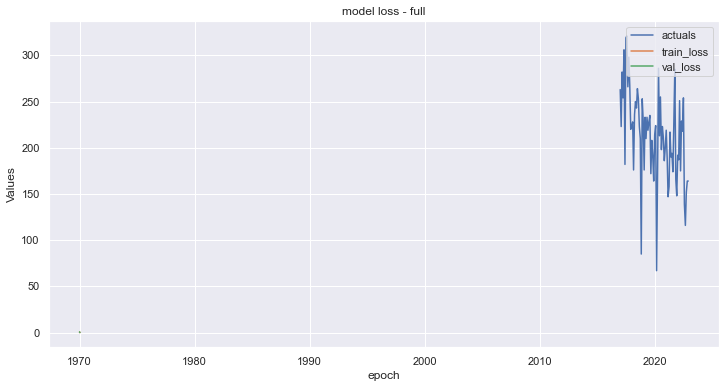

2/2 [==============================] - 0s 2ms/step
Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 0.3298 - val_loss: 0.3371
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 0.3259 - val_loss: 0.3329
Epoch 3/5
1/1 [==============================] - 0s 18ms/step - loss: 0.3219 - val_loss: 0.3287
Epoch 4/5
1/1 [==============================] - 0s 18ms/step - loss: 0.3179 - val_loss: 0.3244
Epoch 5/5
1/1 [==============================] - 0s 165ms/step
Epoch 1/5
2/2 [==============================] - 2s 803ms/step - loss: 0.2855 - val_loss: 0.3300
Epoch 2/5
2/2 [==============================] - 0s 19ms/step - loss: 0.2778 - val_loss: 0.3211
Epoch 3/5
2/2 [==============================] - 0s 20ms/step - loss: 0.2702 - val_loss: 0.3128
Epoch 4/5
2/2 [==============================] - 0s 19ms/step - loss: 0.2628 - val_loss: 0.3045
Epoch 5/5
2/2 [==============================] - 0s 2ms/step
Epoch 1/25
1/1 [==============================] - 3s 3s/st

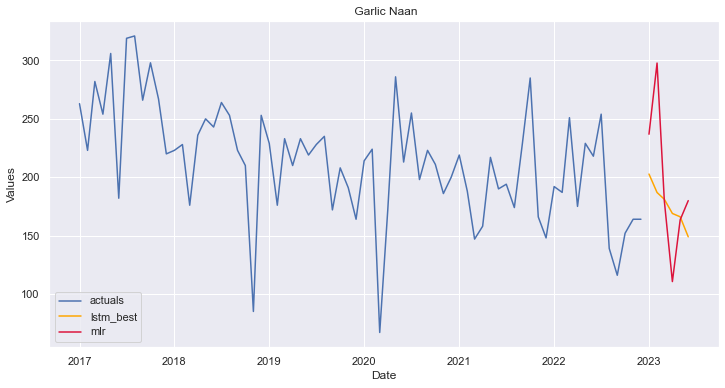

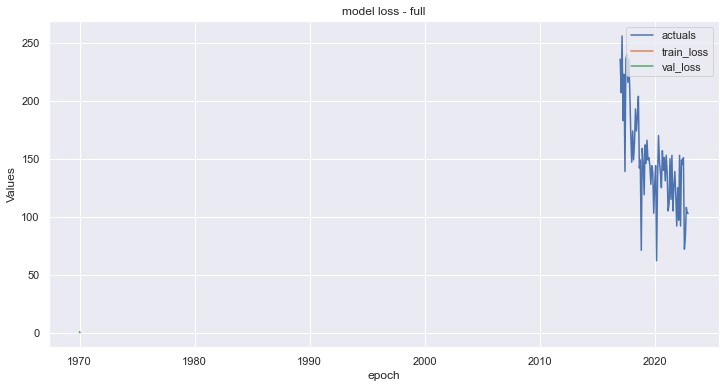

2/2 [==============================] - 0s 2ms/step
Epoch 1/5
1/1 [==============================] - 1s 998ms/step - loss: 0.2981 - val_loss: 0.3139
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 0.2942 - val_loss: 0.3096
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 0.2903 - val_loss: 0.3053
Epoch 4/5
1/1 [==============================] - 0s 19ms/step - loss: 0.2863 - val_loss: 0.3009
Epoch 5/5
1/1 [==============================] - 0s 164ms/step
Epoch 1/5
2/2 [==============================] - 2s 202ms/step - loss: 0.2745 - val_loss: 0.3038
Epoch 2/5
2/2 [==============================] - 0s 17ms/step - loss: 0.2665 - val_loss: 0.2945
Epoch 3/5
2/2 [==============================] - 0s 16ms/step - loss: 0.2586 - val_loss: 0.2849
Epoch 4/5
2/2 [==============================] - 0s 16ms/step - loss: 0.2507 - val_loss: 0.2750
Epoch 5/5
2/2 [==============================] - 0s 3ms/step
Epoch 1/25
1/1 [==============================] - 3s 3s

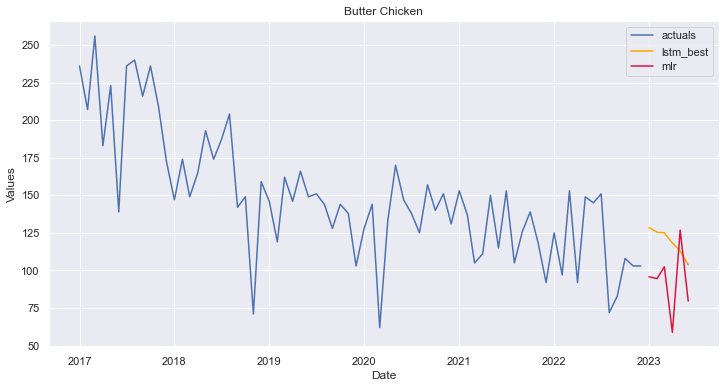

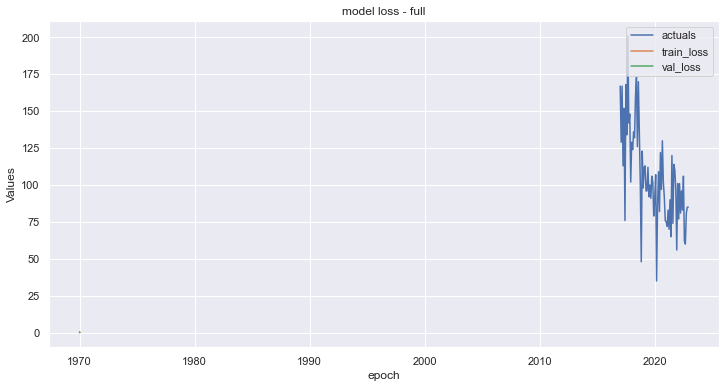

2/2 [==============================] - 0s 2ms/step
Epoch 1/5
1/1 [==============================] - 1s 987ms/step - loss: 0.4822 - val_loss: 0.4408
Epoch 2/5
1/1 [==============================] - 0s 18ms/step - loss: 0.4777 - val_loss: 0.4365
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 0.4733 - val_loss: 0.4321
Epoch 4/5
1/1 [==============================] - 0s 18ms/step - loss: 0.4688 - val_loss: 0.4278
Epoch 5/5
1/1 [==============================] - 0s 161ms/step
Epoch 1/5
2/2 [==============================] - 1s 207ms/step - loss: 0.4350 - val_loss: 0.4319
Epoch 2/5
2/2 [==============================] - 0s 17ms/step - loss: 0.4260 - val_loss: 0.4224
Epoch 3/5
2/2 [==============================] - 0s 17ms/step - loss: 0.4168 - val_loss: 0.4126
Epoch 4/5
2/2 [==============================] - 0s 17ms/step - loss: 0.4076 - val_loss: 0.4026
Epoch 5/5
2/2 [==============================] - 0s 2ms/step
Epoch 1/25
1/1 [==============================] - 3s 3s

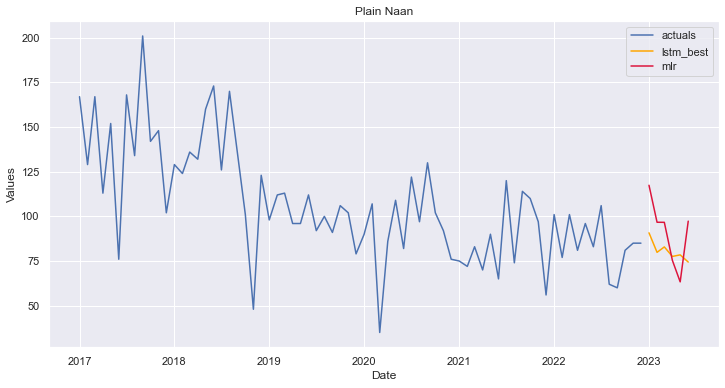

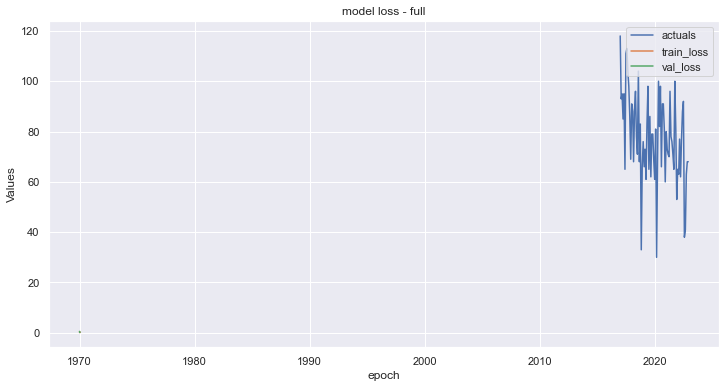

2/2 [==============================] - 0s 2ms/step
Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 0.3210 - val_loss: 0.3514
Epoch 2/5
1/1 [==============================] - 0s 20ms/step - loss: 0.3170 - val_loss: 0.3475
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 0.3130 - val_loss: 0.3435
Epoch 4/5
1/1 [==============================] - 0s 20ms/step - loss: 0.3090 - val_loss: 0.3395
Epoch 5/5
1/1 [==============================] - 0s 161ms/step
Epoch 1/5
2/2 [==============================] - 1s 203ms/step - loss: 0.2989 - val_loss: 0.3582
Epoch 2/5
2/2 [==============================] - 0s 16ms/step - loss: 0.2912 - val_loss: 0.3491
Epoch 3/5
2/2 [==============================] - 0s 16ms/step - loss: 0.2833 - val_loss: 0.3398
Epoch 4/5
2/2 [==============================] - 0s 17ms/step - loss: 0.2754 - val_loss: 0.3310
Epoch 5/5
2/2 [==============================] - 0s 2ms/step
Epoch 1/25
1/1 [==============================] - 3s 3s/st

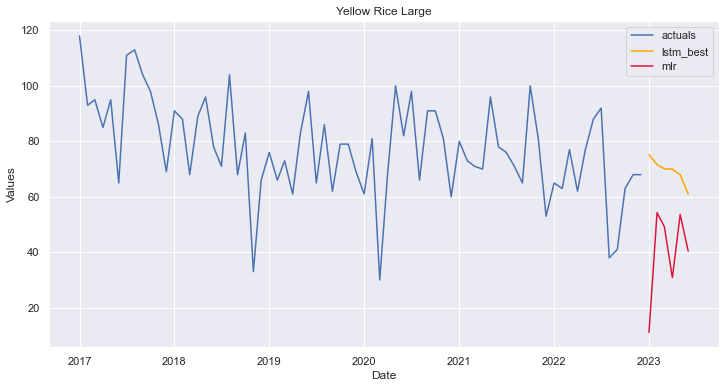

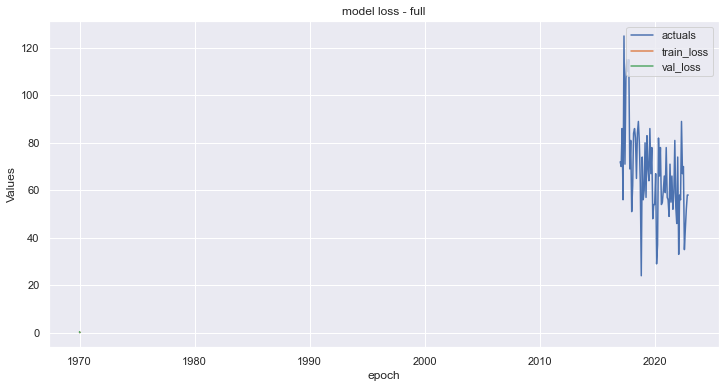

2/2 [==============================] - 0s 2ms/step
Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 0.3686 - val_loss: 0.3599
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 0.3645 - val_loss: 0.3555
Epoch 3/5
1/1 [==============================] - 0s 20ms/step - loss: 0.3604 - val_loss: 0.3511
Epoch 4/5
1/1 [==============================] - 0s 20ms/step - loss: 0.3562 - val_loss: 0.3467
Epoch 5/5
1/1 [==============================] - 0s 161ms/step
Epoch 1/5
2/2 [==============================] - 1s 203ms/step - loss: 0.3491 - val_loss: 0.3607
Epoch 2/5
2/2 [==============================] - 0s 21ms/step - loss: 0.3409 - val_loss: 0.3516
Epoch 3/5
2/2 [==============================] - 0s 17ms/step - loss: 0.3326 - val_loss: 0.3426
Epoch 4/5
2/2 [==============================] - 0s 19ms/step - loss: 0.3240 - val_loss: 0.3333
Epoch 5/5
2/2 [==============================] - 0s 2ms/step
Epoch 1/25
1/1 [==============================] - 3s 3s/st

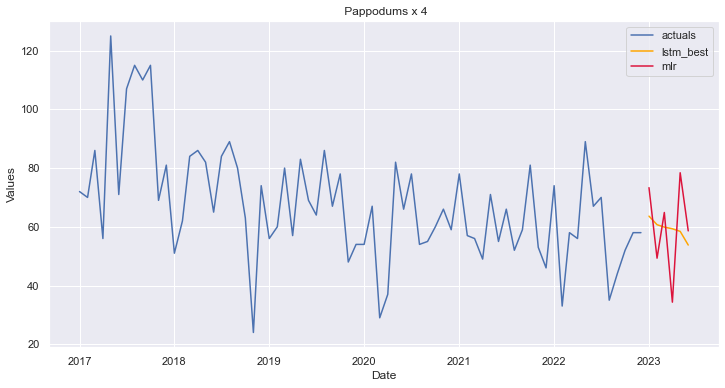

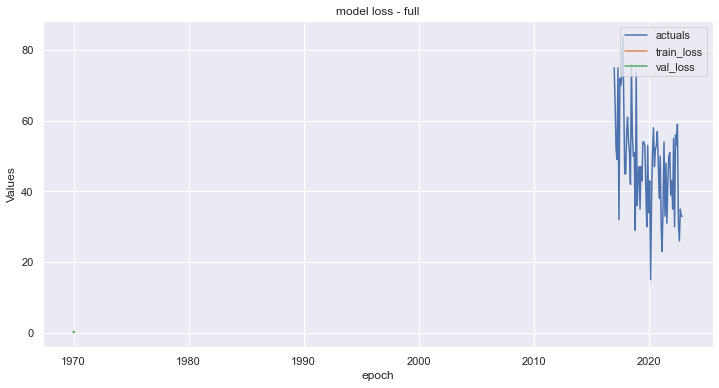

2/2 [==============================] - 0s 997us/step
Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 0.4092 - val_loss: 0.4384
Epoch 2/5
1/1 [==============================] - 0s 20ms/step - loss: 0.4049 - val_loss: 0.4339
Epoch 3/5
1/1 [==============================] - 0s 21ms/step - loss: 0.4004 - val_loss: 0.4293
Epoch 4/5
1/1 [==============================] - 0s 21ms/step - loss: 0.3960 - val_loss: 0.4247
Epoch 5/5
1/1 [==============================] - 0s 167ms/step
Epoch 1/5
2/2 [==============================] - 1s 202ms/step - loss: 0.4065 - val_loss: 0.4492
Epoch 2/5
2/2 [==============================] - 0s 19ms/step - loss: 0.3972 - val_loss: 0.4393
Epoch 3/5
2/2 [==============================] - 0s 19ms/step - loss: 0.3878 - val_loss: 0.4292
Epoch 4/5
2/2 [==============================] - 0s 19ms/step - loss: 0.3780 - val_loss: 0.4186
Epoch 5/5
2/2 [==============================] - 0s 3ms/step
Epoch 1/25
1/1 [==============================] - 3s 3s/

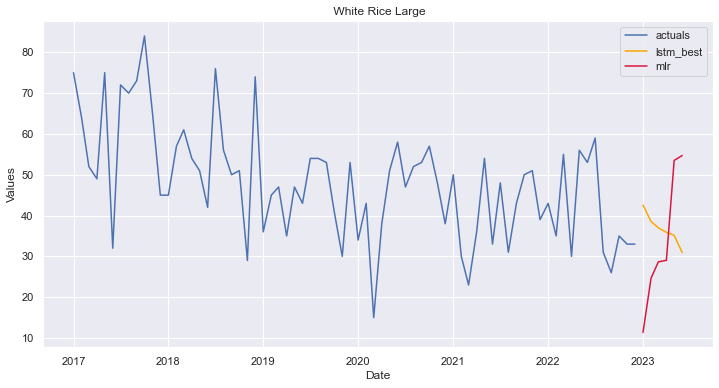

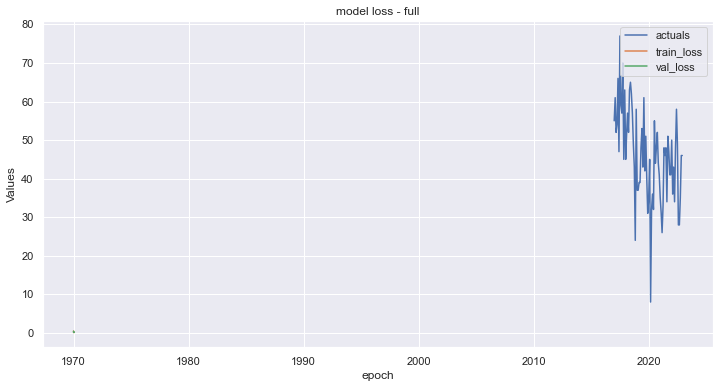

2/2 [==============================] - 0s 2ms/step


IndexError: tuple index out of range

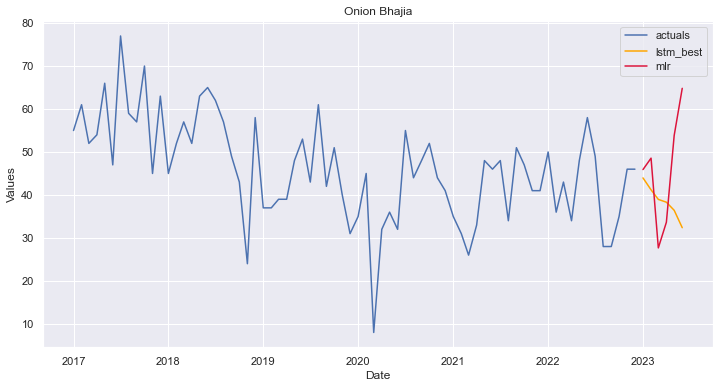

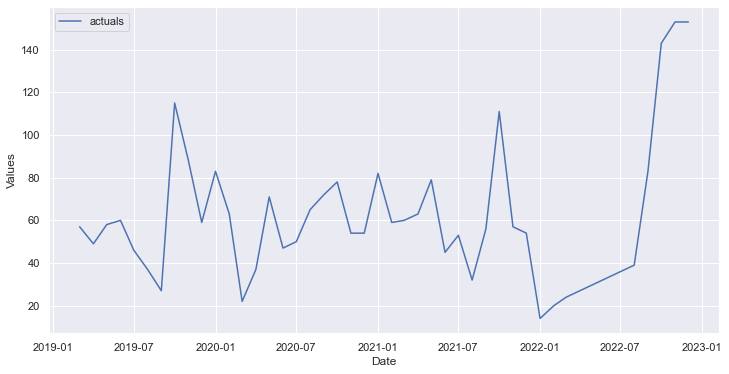

In [1316]:
for i in range(20):
    item = total_sold_df.loc[i,'item']
    item_df = sql_item(item)
    item_df = item_df.drop_duplicates('date')
    ml_engine(item_df, item)
    

In [912]:
# Verify that a temporary index is complete
# ==============================================================================
(test_df.index == pd.date_range(start=test_df.index.min(),
                             end=test_df.index.max(),
                             freq=test_df.index.freq)).all()

True

Train dates : 2017-01-01 00:00:00 --- 2019-08-01 00:00:00  (n=32)
Test dates  : 2019-09-01 00:00:00 --- 2022-12-01 00:00:00  (n=40)


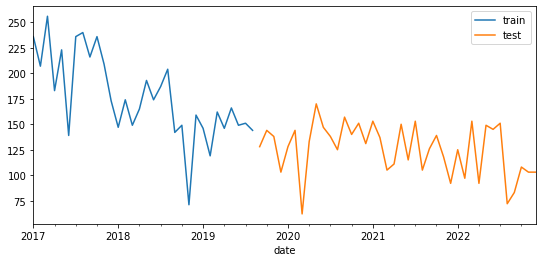

In [938]:
steps = 40
data_train = test_df[:-steps]
data_test  = test_df[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

fig, ax=plt.subplots(figsize=(9, 4))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
ax.legend();

In [1288]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = Lasso(random_state=123),
                lags      = 12
             )

forecaster.fit(y=data_train['y'])
forecaster

ForecasterAutoreg 
Regressor: Lasso(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
Transformer for y: None 
Transformer for exog: None 
Window size: 12 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2017-01-01 00:00:00'), Timestamp('2019-12-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': 'deprecated', 'positive': False, 'precompute': False, 'random_state': 123, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False} 
Creation date: 2022-12-12 08:21:11 
Last fit date: 2022-12-12 08:21:11 
Skforecast version: 0.6.0 
Python version: 3.7.7 

In [1289]:
# Predictions
# ==============================================================================
steps = 60
predictions = forecaster.predict(steps=steps)
predictions.head(5)

2020-01-01    144.760746
2020-02-01    140.891788
2020-03-01    143.512361
2020-04-01    143.156391
2020-05-01    135.021583
Freq: MS, Name: pred, dtype: float64

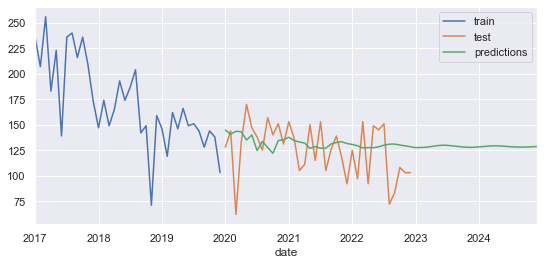

In [1290]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [945]:
error_mse = mean_squared_error(
                y_true = data_test['y'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 1193.6987833687206


In [962]:
# Hyperparameter Grid search
# ==============================================================================
steps = 40
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [10, 20]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data_train['y'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)*0.7),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 12.


loop lags_grid:   0%|                                               | 0/2 [00:00<?, ?it/s]


ValueError: Invalid parameter max_depth for estimator Lasso(random_state=123). Check the list of available parameters with `estimator.get_params().keys()`.

In [950]:
# Grid Search results
# ==============================================================================
results_grid

lags  \
7   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
9   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
11  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
6   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
8   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
10  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
0                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
2                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
4                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
3                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
5                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
1                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   

                                    params  mean_squared_error  max_depth  \
7    {'max_depth': 3, 'n_estimators': 500}          708.796738          3   
9    {'max_depth': 5, 'n_estimators': 500}          708.796738          5   
11  {'max_depth': 10, 'n_estimators': 500}          708.796738         10   
6    {'max_depth': 3, 'n_estimators': 100}          710.018090          3   
8    {'max_depth': 5, 'n_estimators': 100}          710.018090          5   
10  {'max_depth': 10, 'n_estimators': 100}          710.018090         10   
0    {'max_depth': 3, 'n_estimators': 100}         1049.201313          3   
2    {'max_depth': 5, 'n_estimators': 100}         1050.493900          5   
4   {'max_depth': 10, 'n_estimators': 100}         1050.493900         10   
3    {'max_depth': 5, 'n_estimators': 500}         1053.825418          5   
5   {'max_depth': 10, 'n_estimators': 500}         1053.825418         10   
1    {'max_depth': 3, 'n_estimators': 500}         1054.607464          3   

    n_estimators  
7            500  
9            500  
11           500  
6            100  
8            100  
10           100  
0            100  
2            100  
4            100  
3            500  
5            500  
1            500

In [1291]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = Lasso()
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 20
             )

forecaster.fit(y=data_train['y'])

In [1292]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=40)

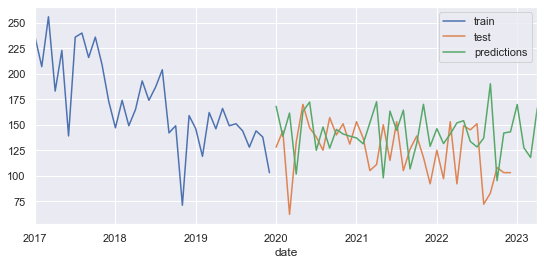

In [1293]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [318]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [372]:
model_df = test_df
model_df.reset_index()

date            item    y
0  2017-01-01  Butter Chicken  236
1  2017-02-01  Butter Chicken  207
2  2017-03-01  Butter Chicken  256
3  2017-04-01  Butter Chicken  183
4  2017-05-01  Butter Chicken  223
..        ...             ...  ...
67 2022-08-01  Butter Chicken   72
68 2022-09-01  Butter Chicken   83
69 2022-10-01  Butter Chicken  108
70 2022-11-01  Butter Chicken  103
71 2022-12-01  Butter Chicken  103

[72 rows x 3 columns]

In [ ]:
calendar.year_abbr

In [486]:
model_df
jan_df = model_df[model_df.index.month.isin([1])]
jan_df = jan_df.reset_index()
#jan_df['date'] = jan_df['date'].astype(str)
jan_df

date            item    y
0 2017-01-01  Butter Chicken  236
1 2018-01-01  Butter Chicken  147
2 2019-01-01  Butter Chicken  146
3 2020-01-01  Butter Chicken  128
4 2021-01-01  Butter Chicken  153
5 2022-01-01  Butter Chicken  125

In [487]:
jan_df
jan_df['Year'] = jan_df['date'].dt.strftime('%Y')
jan_df = jan_df.reset_index()
jan_df = jan_df.drop(0)
jan_df.head()

index       date            item    y  Year
1      1 2018-01-01  Butter Chicken  147  2018
2      2 2019-01-01  Butter Chicken  146  2019
3      3 2020-01-01  Butter Chicken  128  2020
4      4 2021-01-01  Butter Chicken  153  2021
5      5 2022-01-01  Butter Chicken  125  2022

In [488]:
X = jan_df.drop(['y','item','date', "index"], axis=1)
y = jan_df["y"]



In [489]:
y

1    147
2    146
3    128
4    153
5    125
Name: y, dtype: int64

In [490]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [472]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [491]:
reg = LinearRegression().fit(X_train, y_train)
print(reg.coef_)


[-3.76923077]


In [446]:
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(reg)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=Lasso(max_iter=2000))

In [492]:
reg = Lasso(max_iter=10000).fit(X_train, y_train)
print(reg.coef_)


[-3.42307692]


In [493]:
reg = Ridge(alpha=100).fit(X_train, y_train)
print(reg.coef_)


[-0.3006135]


In [515]:
test_df.head(20)

item    y
date                           
2017-01-01  Butter Chicken  236
2017-02-01  Butter Chicken  207
2017-03-01  Butter Chicken  256
2017-04-01  Butter Chicken  183
2017-05-01  Butter Chicken  223
2017-06-01  Butter Chicken  139
2017-07-01  Butter Chicken  236
2017-08-01  Butter Chicken  240
2017-09-01  Butter Chicken  216
2017-10-01  Butter Chicken  236
2017-11-01  Butter Chicken  209
2017-12-01  Butter Chicken  173
2018-01-01  Butter Chicken  147
2018-02-01  Butter Chicken  174
2018-03-01  Butter Chicken  149
2018-04-01  Butter Chicken  165
2018-05-01  Butter Chicken  193
2018-06-01  Butter Chicken  174
2018-07-01  Butter Chicken  187
2018-08-01  Butter Chicken  204

In [518]:
test2 = test_df

In [521]:
test2 = test2.reset_index()

In [522]:
test2.

date            item    y
0  2017-01-01  Butter Chicken  236
1  2017-02-01  Butter Chicken  207
2  2017-03-01  Butter Chicken  256
3  2017-04-01  Butter Chicken  183
4  2017-05-01  Butter Chicken  223
5  2017-06-01  Butter Chicken  139
6  2017-07-01  Butter Chicken  236
7  2017-08-01  Butter Chicken  240
8  2017-09-01  Butter Chicken  216
9  2017-10-01  Butter Chicken  236
10 2017-11-01  Butter Chicken  209
11 2017-12-01  Butter Chicken  173
12 2018-01-01  Butter Chicken  147
13 2018-02-01  Butter Chicken  174
14 2018-03-01  Butter Chicken  149
15 2018-04-01  Butter Chicken  165
16 2018-05-01  Butter Chicken  193
17 2018-06-01  Butter Chicken  174
18 2018-07-01  Butter Chicken  187
19 2018-08-01  Butter Chicken  204

In [618]:
sales = test2['y']
time_step = test2.index


In [619]:
series = np.array(sales)
time = np.array(time_step)

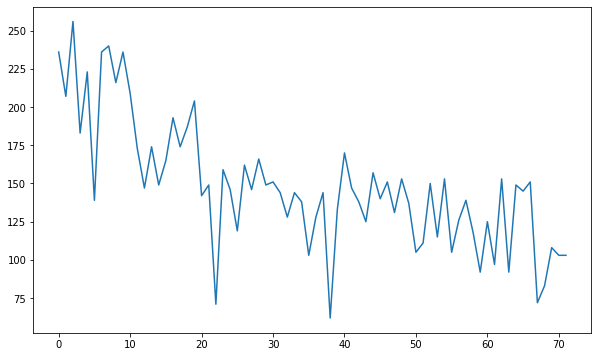

In [620]:
plt.figure(figsize=(10, 6))
plt.plot(time, series)

In [723]:
split_time = 35
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [622]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
 series = tf.expand_dims(series, axis=-1)
 ds = tf.data.Dataset.from_tensor_slices(series)
 ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
 ds = ds.flat_map(lambda w: w.batch(window_size + 1))
 ds = ds.shuffle(shuffle_buffer)
 ds = ds.map(lambda w: (w[:-1], w[1:]))
 return ds.batch(batch_size).prefetch(1)

In [623]:
import tensorflow as tf

In [724]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
shuffle_buffer_size = 150
window_size = 20
batch_size = 35
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(x_train.shape)

(35,)


In [737]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
 tf.keras.layers.Conv1D(filters=60, kernel_size=5,
 strides=1, padding="causal",
 activation="relu",
 input_shape=[None, 1]),
 tf.keras.layers.LSTM(10, return_sequences=True),
 tf.keras.layers.LSTM(10, return_sequences=True),
 tf.keras.layers.Dense(130, activation="relu"),
 tf.keras.layers.Dense(20, activation="relu"),
 tf.keras.layers.Dense(10, activation="relu"),
 tf.keras.layers.Dense(1),
 tf.keras.layers.Lambda(lambda x: x * 400)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, None, 60)          360       
                                                                 
 lstm (LSTM)                 (None, None, 10)          2840      
                                                                 
 lstm_1 (LSTM)               (None, None, 10)          840       
                                                                 
 dense (Dense)               (None, None, 130)         1430      
                                                                 
 dense_1 (Dense)             (None, None, 20)          2620      
                                                                 
 dense_2 (Dense)             (None, None, 10)          210       
                                                                 
 dense_3 (Dense)             (None, None, 1)           1

In [738]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
 optimizer=optimizer,
 metrics=["mae"])
history = model.fit(train_set,epochs=400)

Epoch 1/400
1/1 [==============================] - 2s 2s/step - loss: 165.1006 - mae: 165.6006
Epoch 2/400
1/1 [==============================] - 0s 14ms/step - loss: 162.3867 - mae: 162.8867
Epoch 3/400
1/1 [==============================] - 0s 14ms/step - loss: 157.2346 - mae: 157.7346
Epoch 4/400
1/1 [==============================] - 0s 13ms/step - loss: 149.8552 - mae: 150.3552
Epoch 5/400
1/1 [==============================] - 0s 14ms/step - loss: 140.3737 - mae: 140.8737
Epoch 6/400
1/1 [==============================] - 0s 14ms/step - loss: 129.2188 - mae: 129.7188
Epoch 7/400
1/1 [==============================] - 0s 12ms/step - loss: 116.9723 - mae: 117.4723
Epoch 8/400
1/1 [==============================] - 0s 14ms/step - loss: 103.5222 - mae: 104.0222
Epoch 9/400
1/1 [==============================] - 0s 13ms/step - loss: 89.9242 - mae: 90.4242
Epoch 10/400
1/1 [==============================] - 0s 13ms/step - loss: 75.8503 - mae: 76.3503
Epoch 11/400
1/1 [=================

<Figure size 432x288 with 0 Axes>

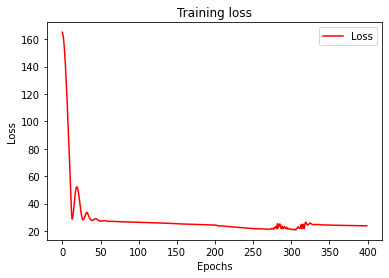

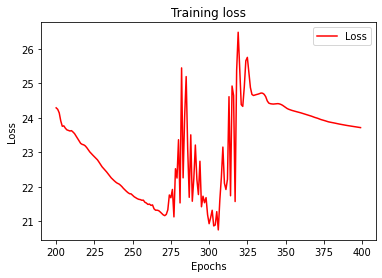

<Figure size 432x288 with 0 Axes>

In [739]:
# — — — — — — — — — — — — — — — — — — — — — — — — — — — — — -
# Retrieve a list of list results on training and test data
# sets for each training epoch
# — — — — — — — — — — — — — — — — — — — — — — — — — — — — — -
loss=history.history['loss']
epochs=range(len(loss)) # Get number of epochs
# — — — — — — — — — — — — — — — — — — — — — — — — 
# Plot training and validation loss per epoch
# — — — — — — — — — — — — — — — — — — — — — — — — 
plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss'])
plt.figure()
zoomed_loss = loss[200:]
zoomed_epochs = range(200,400)
# — — — — — — — — — — — — — — — — — — — — — — — — 
# Plot training and validation loss per epoch
# — — — — — — — — — — — — — — — — — — — — — — — — 
plt.plot(zoomed_epochs, zoomed_loss, 'r')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss'])
plt.figure()

In [652]:
def model_forecast(model, series, window_size):
 ds = tf.data.Dataset.from_tensor_slices(series)
 ds = ds.window(window_size, shift=1, drop_remainder=True)
 ds = ds.flat_map(lambda w: w.batch(window_size))
 ds = ds.batch(32).prefetch(1)
 forecast = model.predict(ds)
 return forecast

2/2 [==============================] - 0s 11ms/step


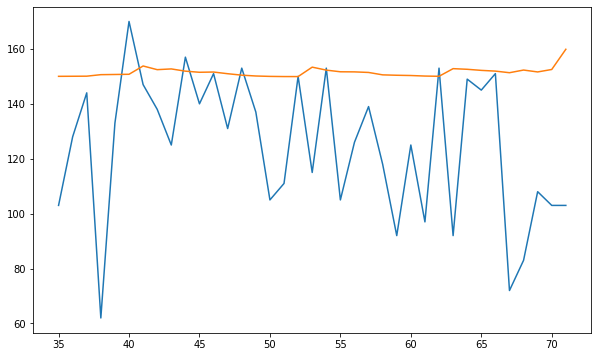

In [740]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]
plt.figure(figsize=(10, 6))
plt.plot(time_valid, x_valid)
plt.plot(time_valid, rnn_forecast)

In [705]:
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 1s - loss: 14.7499 - mae: 15.2499 - 633ms/epoch - 633ms/step
Loss: 14.749885559082031, Accuracy: 15.249885559082031


In [778]:
test2_df = test_df.reset_index()
test2_df = test2_df.reset_index()
test2_df

index       date            item    y
0       0 2017-01-01  Butter Chicken  236
1       1 2017-02-01  Butter Chicken  207
2       2 2017-03-01  Butter Chicken  256
3       3 2017-04-01  Butter Chicken  183
4       4 2017-05-01  Butter Chicken  223
..    ...        ...             ...  ...
67     67 2022-08-01  Butter Chicken   72
68     68 2022-09-01  Butter Chicken   83
69     69 2022-10-01  Butter Chicken  108
70     70 2022-11-01  Butter Chicken  103
71     71 2022-12-01  Butter Chicken  103

[72 rows x 4 columns]

In [747]:
from sklearn import linear_model
import statsmodels.api as sm

In [779]:
test2_df['index'] = test2_df['index']+1

In [780]:
x = test2_df[['index']]
y = test2_df['y']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 200.32316118935836
Coefficients: 
 [-1.42628143]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     73.43
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           1.64e-12
Time:                        18:42:32   Log-Likelihood:                -344.46
No. Observations:                  72   AIC:                             692.9
Df Residuals:                      70   BIC:                             697.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

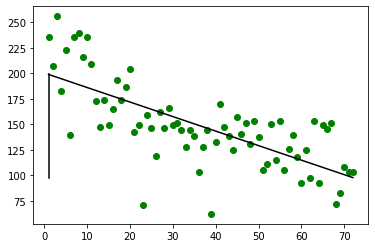

In [781]:
plt.scatter(test2_df['index'],test2_df['y'],color='g')
plt.plot(x, predictions,color='k')

plt.show()

In [782]:
import seaborn as sns

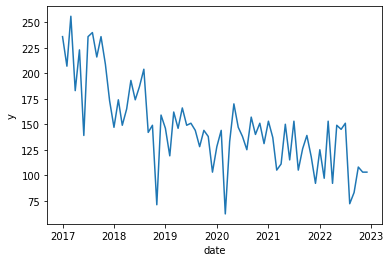

In [783]:
sns.lineplot(x=test_df.index, y="y", data=test_df);

<AxesSubplot:xlabel='date', ylabel='y'>

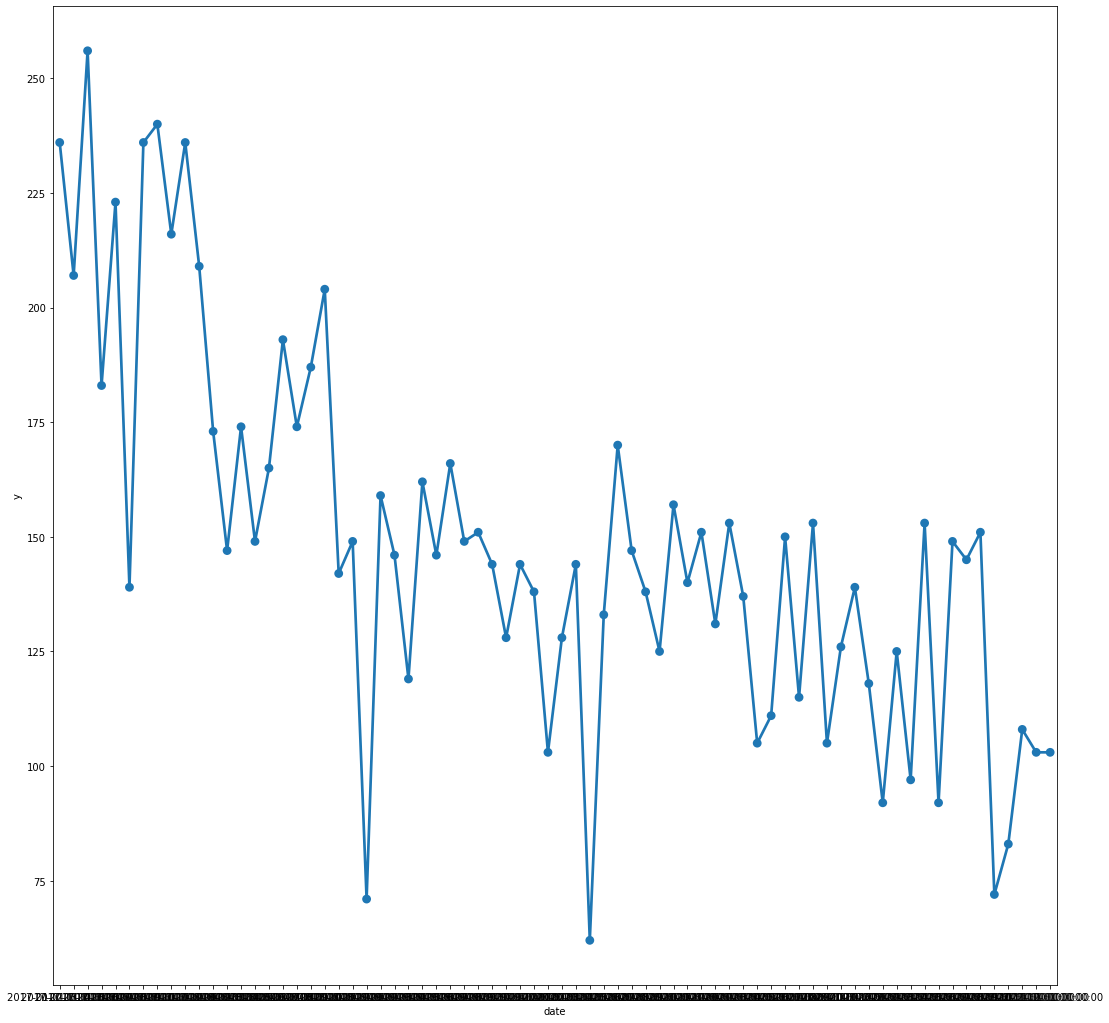

In [786]:
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(18, 18)

sns.pointplot(data=test_df, x=test_df.index, y='y', ax=ax1)

In [815]:
train_size = int(len(test3) * 0.9)
test_size = len(test3) - train_size
train, test = test3.iloc[0:train_size], test3.iloc[train_size:len(test3)]
print(len(train), len(test))

64 8


In [812]:
test3 = test_df.reset_index()
test3 = test3[['date','y']]
#test3['date'] = test3['date'].astype(str)
test3['month'] = test3['date'].dt.month
test3.head()

date    y  month
0 2017-01-01  236      1
1 2017-02-01  207      2
2 2017-03-01  256      3
3 2017-04-01  183      4
4 2017-05-01  223      5

In [816]:
from sklearn.preprocessing import RobustScaler

f_columns = ['month']

f_transformer = RobustScaler()
cnt_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['y']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['y'] = cnt_transformer.transform(train[['y']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['y'] = cnt_transformer.transform(test[['y']])

c:\Users\Jiv\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
c:\Users\Jiv\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
c:\Users\Jiv\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [800]:

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [817]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.y, time_steps)
X_test, y_test = create_dataset(test, test.y, time_steps)

print(X_train.shape, y_train.shape)

(54, 10, 3) (54,)


In [804]:
from tensorflow import keras

In [818]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [819]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type Timestamp).

In [1334]:
item_df = sql_item('Garlic Naan')
item_df

Empty DataFrame
Columns: [item, sold, date]
Index: []

In [891]:
import keras
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [1333]:
test4 = item_df.reset_index()
test4 = test4[['date', 'sale']]
test4

KeyError: "['sale'] not in index"

In [827]:
test4['date'] = test4['date'].dt.to_period('M')
monthly_sales = test4.groupby('date').sum().reset_index()

In [828]:
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()
monthly_sales.head(10)

date    y
0 2017-01-01  236
1 2017-02-01  207
2 2017-03-01  256
3 2017-04-01  183
4 2017-05-01  223
5 2017-06-01  139
6 2017-07-01  236
7 2017-08-01  240
8 2017-09-01  216
9 2017-10-01  236

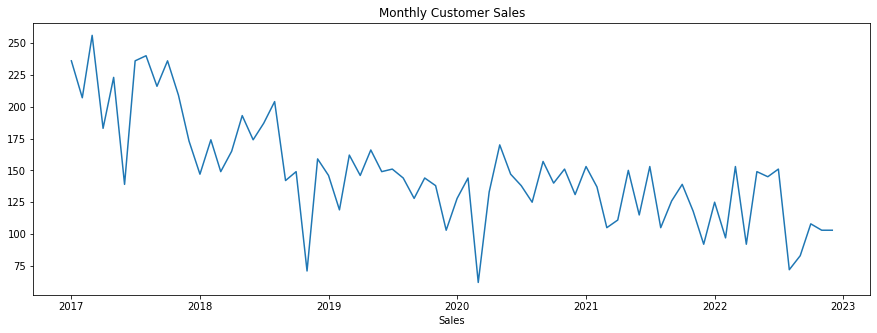

In [830]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'], monthly_sales['y'])
plt.xlabel('Date')
plt.xlabel('Sales')
plt.title("Monthly Customer Sales")
plt.show()

In [831]:
monthly_sales['sales_diff'] = monthly_sales['y'].diff()
monthly_sales = monthly_sales.dropna()
monthly_sales.head(10)

date    y  sales_diff
1  2017-02-01  207       -29.0
2  2017-03-01  256        49.0
3  2017-04-01  183       -73.0
4  2017-05-01  223        40.0
5  2017-06-01  139       -84.0
6  2017-07-01  236        97.0
7  2017-08-01  240         4.0
8  2017-09-01  216       -24.0
9  2017-10-01  236        20.0
10 2017-11-01  209       -27.0

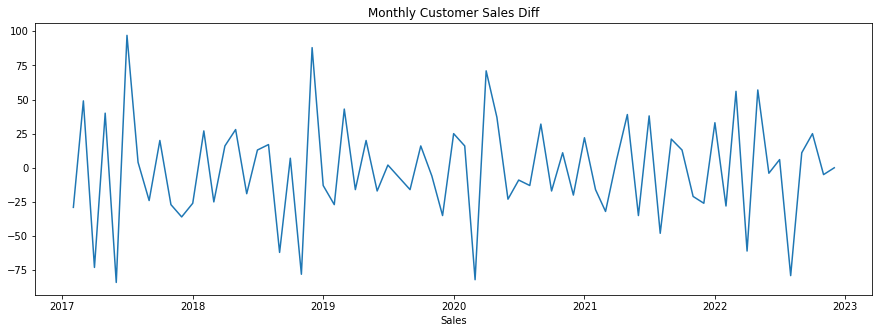

In [833]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'], monthly_sales['sales_diff'])
plt.xlabel('Date')
plt.xlabel('Sales')
plt.title("Monthly Customer Sales Diff")
plt.show()

In [832]:
supverised_data = monthly_sales.drop(['date','y'], axis=1)

In [834]:
for i in range(1,13):
    col_name = 'month_' + str(i)
    supverised_data[col_name] = supverised_data['sales_diff'].shift(i)
supverised_data = supverised_data.dropna().reset_index(drop=True)
supverised_data.head(10)

sales_diff  month_1  month_2  month_3  month_4  month_5  month_6  month_7  \
0        27.0    -26.0    -36.0    -27.0     20.0    -24.0      4.0     97.0   
1       -25.0     27.0    -26.0    -36.0    -27.0     20.0    -24.0      4.0   
2        16.0    -25.0     27.0    -26.0    -36.0    -27.0     20.0    -24.0   
3        28.0     16.0    -25.0     27.0    -26.0    -36.0    -27.0     20.0   
4       -19.0     28.0     16.0    -25.0     27.0    -26.0    -36.0    -27.0   
5        13.0    -19.0     28.0     16.0    -25.0     27.0    -26.0    -36.0   
6        17.0     13.0    -19.0     28.0     16.0    -25.0     27.0    -26.0   
7       -62.0     17.0     13.0    -19.0     28.0     16.0    -25.0     27.0   
8         7.0    -62.0     17.0     13.0    -19.0     28.0     16.0    -25.0   
9       -78.0      7.0    -62.0     17.0     13.0    -19.0     28.0     16.0   

   month_8  month_9  month_10  month_11  month_12  
0    -84.0     40.0     -73.0      49.0     -29.0  
1     97.0    -84.0      40.0     -73.0      49.0  
2      4.0     97.0     -84.0      40.0     -73.0  
3    -24.0      4.0      97.0     -84.0      40.0  
4     20.0    -24.0       4.0      97.0     -84.0  
5    -27.0     20.0     -24.0       4.0      97.0  
6    -36.0    -27.0      20.0     -24.0       4.0  
7    -26.0    -36.0     -27.0      20.0     -24.0  
8     27.0    -26.0     -36.0     -27.0      20.0  
9    -25.0     27.0     -26.0     -36.0     -27.0

In [835]:
train_data = supverised_data[:-12]
test_data = supverised_data[-12:]
print('Train Data Shape:', train_data.shape)
print('Test Data Shape:', test_data.shape)

Train Data Shape: (47, 13)
Test Data Shape: (12, 13)


In [838]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [839]:
X_train, y_train = train_data[:,1:], train_data[:,0:1]
X_test, y_test = test_data[:,1:], test_data[:,0:1]
y_train = y_train.ravel()
y_test = y_test.ravel()
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (47, 12)
y_train Shape: (47,)
X_test Shape: (12, 12)
y_test Shape: (12,)


In [840]:
sales_dates = monthly_sales['date'][-12:].reset_index(drop=True)
predict_df = pd.DataFrame(sales_dates)

In [842]:
	
act_sales = monthly_sales['y'][-13:].to_list()

Forecast Sales using Linear Regression

In [843]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)
linreg_pred = linreg_model.predict(X_test)

In [844]:
linreg_pred = linreg_pred.reshape(-1,1)
linreg_pred_test_set = np.concatenate([linreg_pred,X_test], axis=1)
linreg_pred_test_set = scaler.inverse_transform(linreg_pred_test_set)

In [845]:
result_list = []
for index in range(0, len(linreg_pred_test_set)):
    result_list.append(linreg_pred_test_set[index][0] + act_sales[index])
linreg_pred_series = pd.Series(result_list,name='linreg_pred')
predict_df = predict_df.merge(linreg_pred_series, left_index=True, right_index=True)


In [847]:
linreg_rmse = np.sqrt(mean_squared_error(predict_df['linreg_pred'], monthly_sales['y'][-12:]))
linreg_mae = mean_absolute_error(predict_df['linreg_pred'], monthly_sales['y'][-12:])
linreg_r2 = r2_score(predict_df['linreg_pred'], monthly_sales['y'][-12:])
print('Linear Regression RMSE: ', linreg_rmse)
print('Linear Regression MAE: ', linreg_mae)
print('Linear Regression R2 Score: ', linreg_r2)

Linear Regression RMSE:  28.50254394489696
Linear Regression MAE:  24.31593150588132
Linear Regression R2 Score:  -6.38538599411697


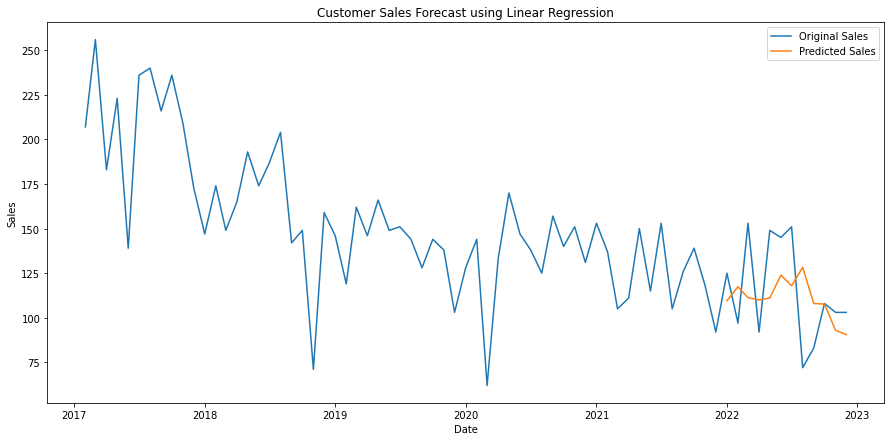

In [848]:
plt.figure(figsize=(15,7))
plt.plot(monthly_sales['date'], monthly_sales['y'])
plt.plot(predict_df['date'], predict_df['linreg_pred'])
plt.title("Customer Sales Forecast using Linear Regression")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(["Original Sales", "Predicted Sales"])
plt.show()

Forecast Sales using Random Forest Regressor

In [878]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=12)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [879]:
rf_pred = rf_pred.reshape(-1,1)
rf_pred_test_set = np.concatenate([rf_pred,X_test], axis=1)
rf_pred_test_set = scaler.inverse_transform(rf_pred_test_set)

In [880]:
result_list = []
for index in range(0, len(rf_pred_test_set)):
    result_list.append(rf_pred_test_set[index][0] + act_sales[index])
rf_pred_series = pd.Series(result_list, name='rf_pred')
predict_df = predict_df.merge(rf_pred_series, left_index=True, right_index=True)


In [881]:
rf_rmse = np.sqrt(mean_squared_error(predict_df['rf_pred'], monthly_sales['y'][-12:]))
rf_mae = mean_absolute_error(predict_df['rf_pred'], monthly_sales['y'][-12:])
rf_r2 = r2_score(predict_df['rf_pred'], monthly_sales['y'][-12:])
print('Random Forest RMSE: ', rf_rmse)
print('Random Forest MAE: ', rf_mae)
print('Random Forest R2 Score: ', rf_r2)

Random Forest RMSE:  35.24382806487777
Random Forest MAE:  30.748333333333324
Random Forest R2 Score:  -1.2909605129069255


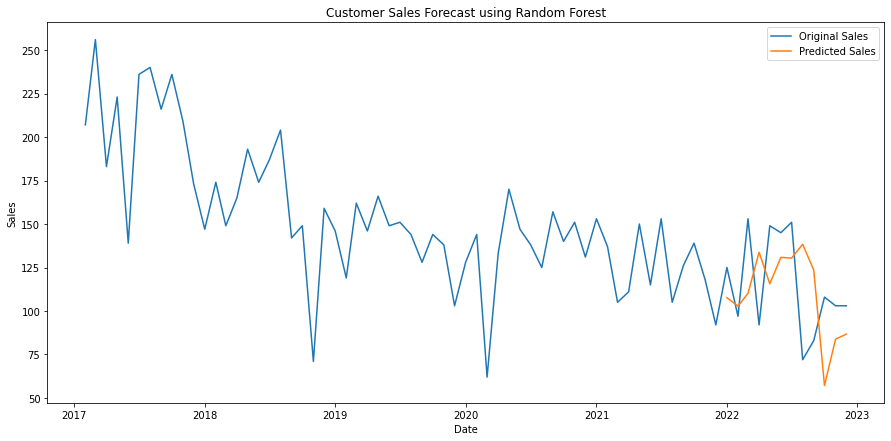

In [882]:
plt.figure(figsize=(15,7))
plt.plot(monthly_sales['date'], monthly_sales['y'])
plt.plot(predict_df['date'], predict_df['rf_pred'])
plt.title("Customer Sales Forecast using Random Forest")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(["Original Sales", "Predicted Sales"])
plt.show()

Forecast Sales using XGBoost Regressor


In [883]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.2, objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [884]:

xgb_pred = xgb_pred.reshape(-1,1)
xgb_pred_test_set = np.concatenate([xgb_pred,X_test], axis=1)
xgb_pred_test_set = scaler.inverse_transform(xgb_pred_test_set)

In [885]:
result_list = []
for index in range(0, len(xgb_pred_test_set)):
    result_list.append(xgb_pred_test_set[index][0] + act_sales[index])
xgb_pred_series = pd.Series(result_list, name='xgb_pred')
predict_df = predict_df.merge(xgb_pred_series, left_index=True, right_index=True)


In [887]:
xgb_rmse = np.sqrt(mean_squared_error(predict_df['xgb_pred'], monthly_sales['y'][-12:]))
xgb_mae = mean_absolute_error(predict_df['xgb_pred'], monthly_sales['y'][-12:])
xgb_r2 = r2_score(predict_df['xgb_pred'], monthly_sales['y'][-12:])
print('XG Boost RMSE: ', xgb_rmse)
print('XG Boost MAE: ', xgb_mae)
print('XG Boost R2 Score: ', xgb_r2)

XG Boost RMSE:  41.42673773325805
XG Boost MAE:  31.560610603230696
XG Boost R2 Score:  -1.001142505665324


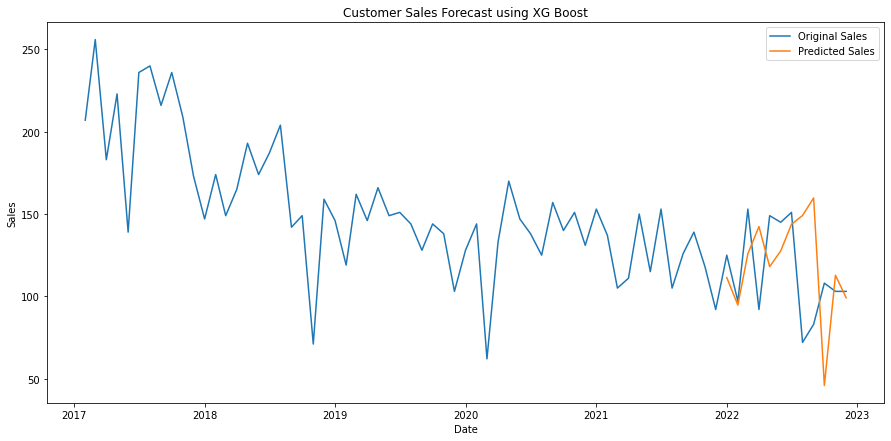

In [888]:
plt.figure(figsize=(15,7))
plt.plot(monthly_sales['date'], monthly_sales['y'])
plt.plot(predict_df['date'], predict_df['xgb_pred'])
plt.title("Customer Sales Forecast using XG Boost")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(["Original Sales", "Predicted Sales"])
plt.show()

Forecast Sales using LSTM RNN

TypeError: unhashable type: 'slice'

In [889]:
checkpoint_filepath = os.getcwd()
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_loss', mode='min', save_best_only=True)
callbacks = [EarlyStopping(patience=5), model_checkpoint_callback]

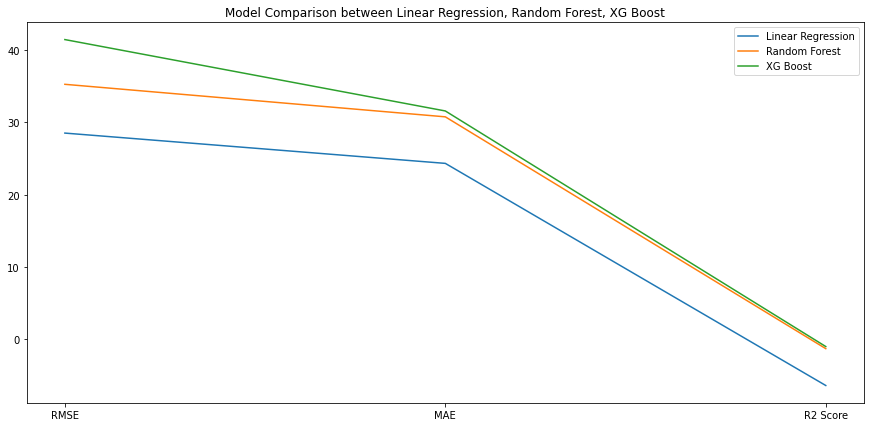

In [893]:
linreg_stats = [linreg_rmse, linreg_mae, linreg_r2]
rf_stats = [rf_rmse, rf_mae, rf_r2]
xgb_stats = [xgb_rmse, xgb_mae, xgb_r2]
#lstm_stats = [lstm_rmse, lstm_mae, lstm_r2]
plt.figure(figsize=(15,7))
plt.plot(linreg_stats)
plt.plot(rf_stats)
plt.plot(xgb_stats)
#plt.plot(lstm_stats)
plt.title("Model Comparison between Linear Regression, Random Forest, XG Boost")
plt.xticks([0,1,2], labels=['RMSE','MAE','R2 Score'])
plt.legend(["Linear Regression", "Random Forest", "XG Boost"])
plt.show()

In [980]:
test_df

item    y
date                           
2017-01-01  Butter Chicken  236
2017-02-01  Butter Chicken  207
2017-03-01  Butter Chicken  256
2017-04-01  Butter Chicken  183
2017-05-01  Butter Chicken  223
...                    ...  ...
2022-08-01  Butter Chicken   72
2022-09-01  Butter Chicken   83
2022-10-01  Butter Chicken  108
2022-11-01  Butter Chicken  103
2022-12-01  Butter Chicken  103

[72 rows x 2 columns]

In [1090]:
data = test_df.copy()
#data = data.rename(columns={'fecha': 'date'})
#data['date'] = pd.to_datetime(data['date'], format='%Y/%m/%d')
#data = data.set_index('date')
#data = data.rename(columns={'x': 'y'})
data = data.asfreq('MS')
data = data.sort_index()

# Split data into train-test
# ==============================================================================
steps = 36
data_train = data[:-steps]
data_test  = data[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

Train dates : 2017-01-01 00:00:00 --- 2019-12-01 00:00:00  (n=36)
Test dates  : 2020-01-01 00:00:00 --- 2022-12-01 00:00:00  (n=36)


In [1103]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                    regressor = Lasso(),
                    lags = 20
                  
             )

forecaster.fit(y=data_train['y'])

# Prediction intervals
# ==============================================================================
predictions = forecaster.predict_interval(
                    steps    = 36,
                    interval = [1, 24],
                    n_boot   = 2000
              )

predictions.describe()
predictions['mean'] = predictions.mean(axis=1)
predictions.head()

pred  lower_bound  upper_bound        mean
2020-01-01  168.125521   167.708967   168.038394  167.957627
2020-02-01  138.635616   138.219061   138.548488  138.467722
2020-03-01  161.463682   161.039462   161.402774  161.301973
2020-04-01  101.593958   101.136345   101.515723  101.415342
2020-05-01  163.115975   162.640954   163.024837  162.927255

Test error (mse): 1651.2226727618645


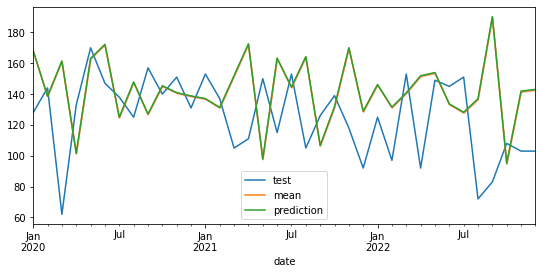

In [1106]:
# Prediction error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['y'],
                y_pred = predictions.iloc[:, 0]
            )

print(f"Test error (mse): {error_mse}")

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_test['y'].plot(ax=ax, label='test')
predictions['mean'].plot(ax=ax, label = 'mean')
predictions['pred'].plot(ax=ax, label='prediction')
ax.fill_between(
    predictions.index,
    predictions['lower_bound'],
    predictions['upper_bound'],
    color = 'red',
    alpha = 0.2
)
ax.legend();

In [1094]:
steps = 60
predictions = forecaster.predict(steps=steps)
predictions.head(5)

2020-01-01    168.125521
2020-02-01    138.635616
2020-03-01    161.463682
2020-04-01    101.593958
2020-05-01    163.115975
Freq: MS, Name: pred, dtype: float64

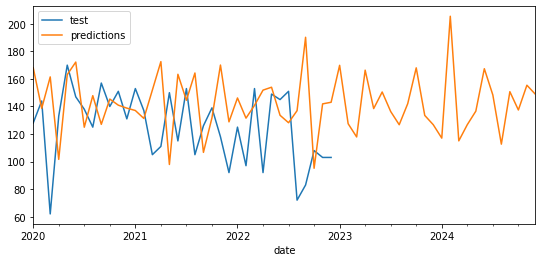

In [1095]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_test['y'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

Information of backtesting process
----------------------------------
Number of observations used for initial training: 36
Number of observations used for backtesting: 36
    Number of folds: 3
    Number of steps per fold: 12

Data partition in fold: 0
    Training:   2017-01-01 00:00:00 -- 2019-12-01 00:00:00  (n=36)
    Validation: 2020-01-01 00:00:00 -- 2020-12-01 00:00:00  (n=12)
Data partition in fold: 1
    Training:   2017-01-01 00:00:00 -- 2020-12-01 00:00:00  (n=48)
    Validation: 2021-01-01 00:00:00 -- 2021-12-01 00:00:00  (n=12)
Data partition in fold: 2
    Training:   2017-01-01 00:00:00 -- 2021-12-01 00:00:00  (n=60)
    Validation: 2022-01-01 00:00:00 -- 2022-12-01 00:00:00  (n=12)

Test error (mse): 1651.2226727618645


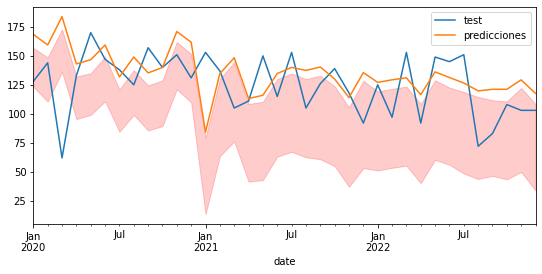

In [1135]:
n_backtesting = 36 # The last 9 years are separated for backtesting
steps = 36
forecaster = ForecasterAutoreg(
                regressor = Lasso(),
                lags      = 16
             )
forecaster.fit(y=data_train['y'])

metric, predictions = backtesting_forecaster(
                            forecaster         = forecaster,
                            y                  = data['y'],
                            initial_train_size = len(data) - n_backtesting,
                            fixed_train_size   = False,
                            steps              = 12,
                            metric             = 'mean_squared_error',
                            refit              = True,
                            interval           = [1, 31],
                            n_boot             = 1000,
                            verbose            = True
                      )

print(f"Test error (mse): {error_mse}")

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data.loc[predictions.index, 'y'].plot(ax=ax, label='test')
predictions['pred'].plot(ax=ax, label='predicciones')
ax.fill_between(
    predictions.index,
    predictions['lower_bound'],
    predictions['upper_bound'],
    color = 'red',
    alpha = 0.2
)
ax.legend();

In [1138]:
steps = 40
predictions = forecaster.predict(steps=steps)
predictions.head(5)

2020-01-01    168.526458
2020-02-01    159.417621
2020-03-01    183.819695
2020-04-01    143.047737
2020-05-01    146.651554
Freq: MS, Name: pred, dtype: float64

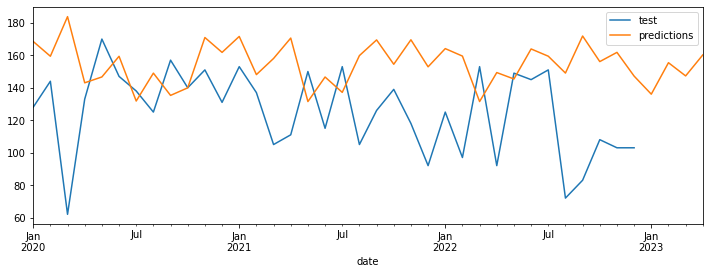

In [1140]:
fig, ax = plt.subplots(figsize=(12, 4))
data_test['y'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [1144]:
test4.head()

date    y
0  2017-01  236
1  2017-02  207
2  2017-03  256
3  2017-04  183
4  2017-05  223

In [1159]:
# univariate data preparation
from numpy import array
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
# find the end of this pattern
        end_ix = i + n_steps
# check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
 # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
    return array(X), array(y)
 


In [1161]:
# define input sequence
#raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 72
# split into samples
X, y = split_sequence(test4['y'], n_steps)
# summarize the data
for i in range(len(X)):
 print(X[i], y[i])

KeyError: 72

In [1163]:

import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster
sns.set(rc={'figure.figsize':(15,8)})

In [1172]:
test4['date'] = test4['date'].dt.to_timestamp()

In [1325]:

f = Forecaster(y=test4['y'],
                   current_dates=test4['date'])

<AxesSubplot:xlabel='Date', ylabel='Values'>

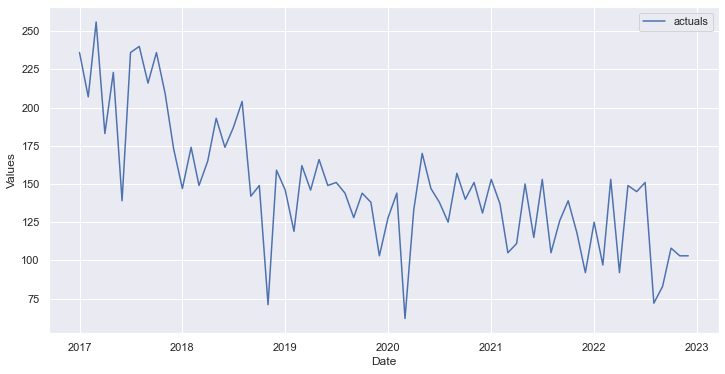

In [1326]:
f.plot()
#plt.legend(loc='best')

py.warnings WARNING C:\Users\Jiv\AppData\Roaming\Python\Python37\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,



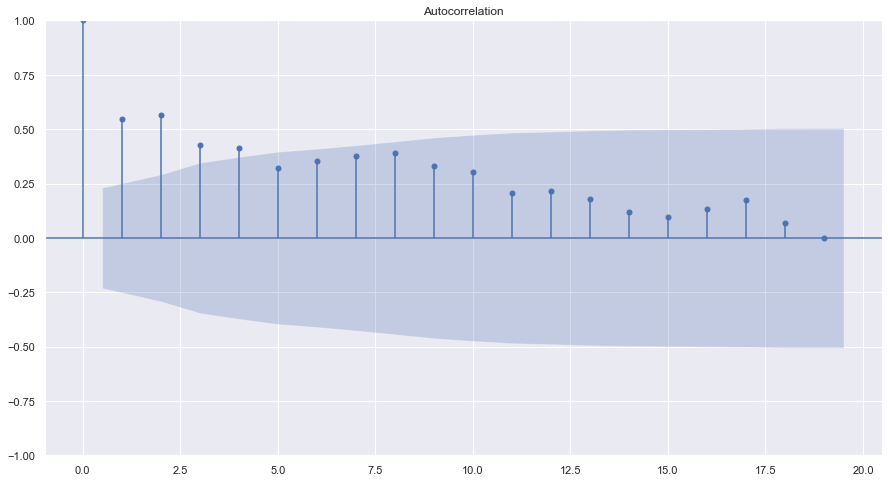

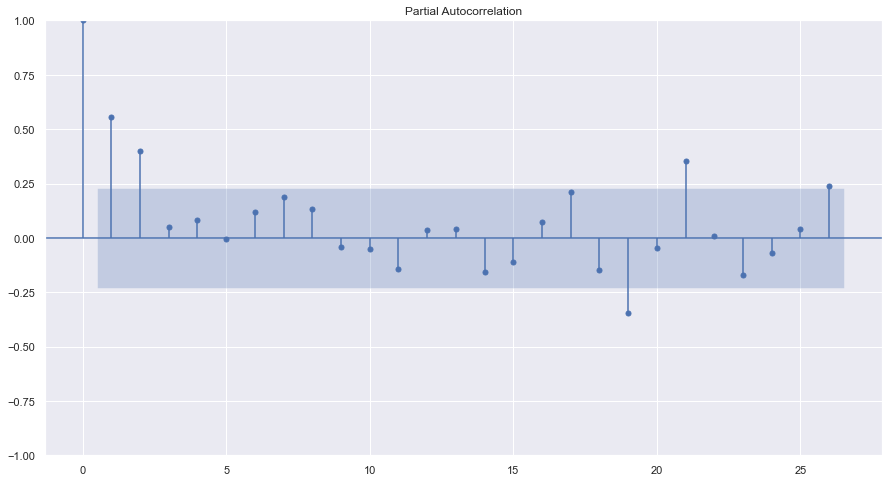

In [1176]:
f.plot_acf()
f.plot_pacf(lags=26)
plt.show()

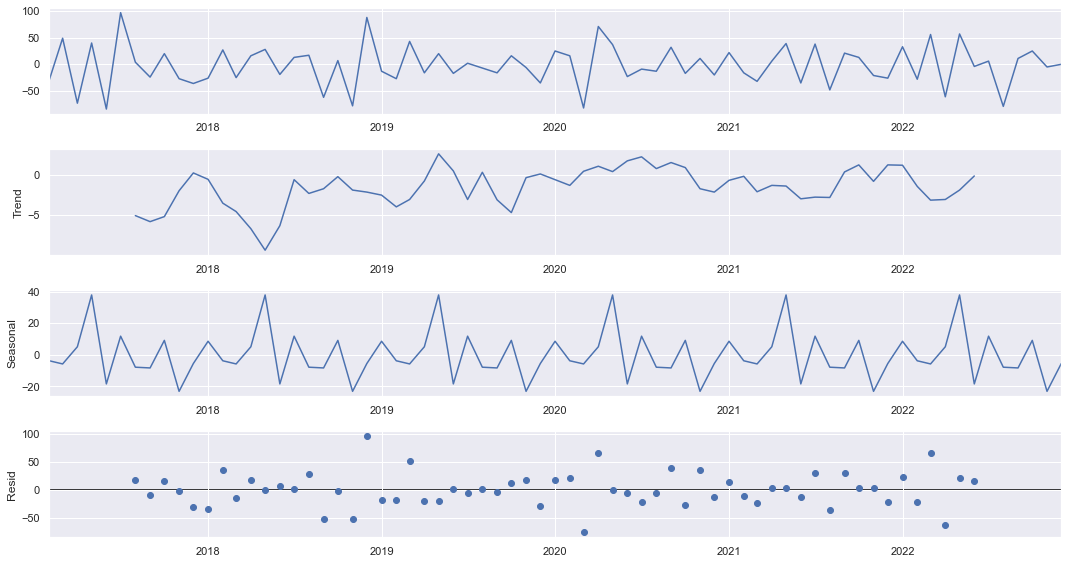

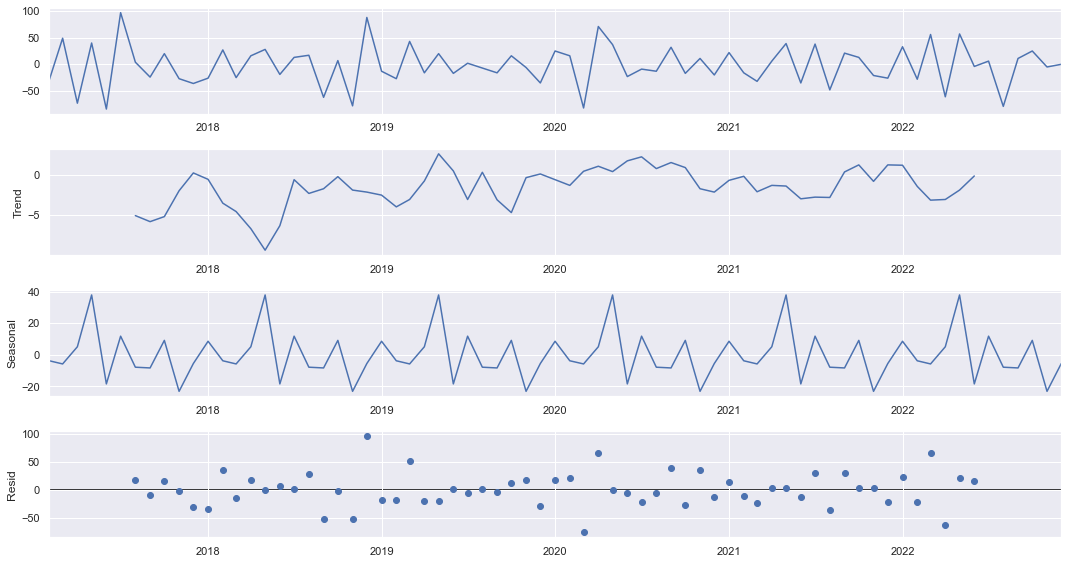

In [1197]:
f.seasonal_decompose().plot()


In [1178]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
stat

-3.225190077767375

In [1179]:
pval

0.018572103100025154

In [1180]:
f.set_test_length(12)       # 1. 12 observations to test the results
f.generate_future_dates(12) # 2. 12 future points to forecast
f.set_estimator('lstm')     # 3. LSTM neural network

2/2 [==============================] - 0s 996us/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

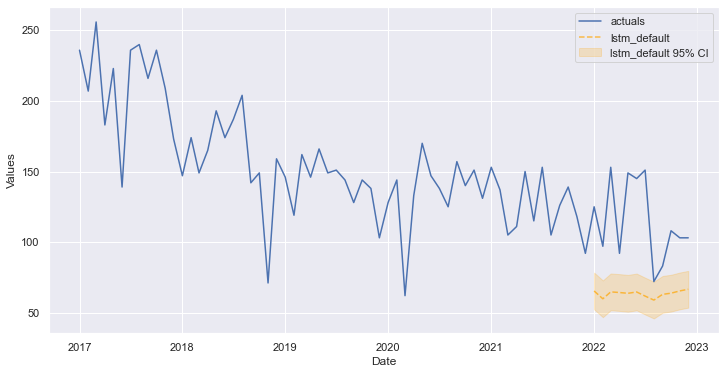

In [1181]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

1/1 [==============================] - 0s 196ms/step


tensorflow WARNING 5 out of the last 406 calls to <function Model.make_train_function.<locals>.train_function at 0x00000189FEB14F78> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 [==============================] - 0s 2ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

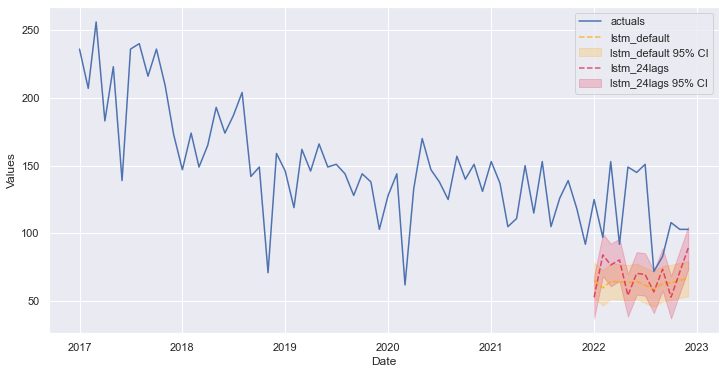

In [1182]:
f.manual_forecast(call_me='lstm_24lags',lags=24)
f.plot_test_set(ci=True)

Epoch 1/5


tensorflow WARNING 6 out of the last 408 calls to <function Model.make_train_function.<locals>.train_function at 0x00000189BA817438> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 1s 1s/step - loss: 0.3298 - val_loss: 0.3371
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 0.3259 - val_loss: 0.3329
Epoch 3/5
1/1 [==============================] - 0s 22ms/step - loss: 0.3219 - val_loss: 0.3287
Epoch 4/5
1/1 [==============================] - 0s 19ms/step - loss: 0.3179 - val_loss: 0.3244
Epoch 5/5
1/1 [==============================] - 0s 183ms/step
Epoch 1/5
1/1 [==============================] - ETA: 0s - loss: 0.3270

tensorflow WARNING 5 out of the last 9 calls to <function Model.make_test_function.<locals>.test_function at 0x00000189B718E8B8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 1s 1s/step - loss: 0.3270 - val_loss: 0.3549
Epoch 2/5
1/1 [==============================] - 0s 21ms/step - loss: 0.3231 - val_loss: 0.3509
Epoch 3/5
1/1 [==============================] - 0s 20ms/step - loss: 0.3194 - val_loss: 0.3468
Epoch 4/5
1/1 [==============================] - 0s 19ms/step - loss: 0.3156 - val_loss: 0.3427
Epoch 5/5
2/2 [==============================] - 0s 2ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

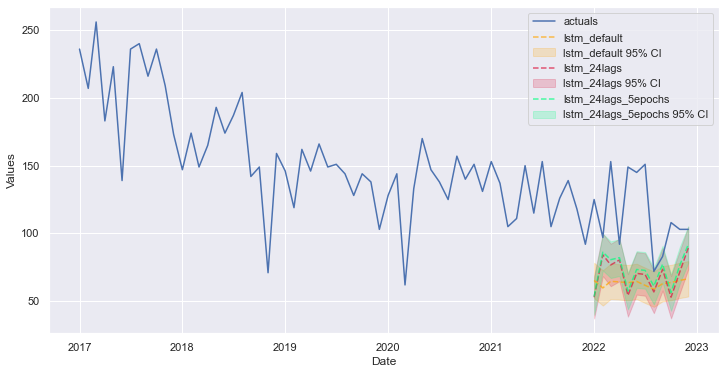

In [1183]:
f.manual_forecast(call_me='lstm_24lags_5epochs',
                  lags=24,
                  epochs=5,
                  validation_split=.2,
                  shuffle=True)
f.plot_test_set(ci=True)

Epoch 1/25
1/1 [==============================] - 3s 3s/step - loss: 0.3658 - val_loss: 0.3703
Epoch 2/25
1/1 [==============================] - 0s 70ms/step - loss: 0.3582 - val_loss: 0.3611
Epoch 3/25
1/1 [==============================] - 0s 26ms/step - loss: 0.3505 - val_loss: 0.3517
Epoch 4/25
1/1 [==============================] - 0s 28ms/step - loss: 0.3427 - val_loss: 0.3423
Epoch 5/25
1/1 [==============================] - 0s 28ms/step - loss: 0.3346 - val_loss: 0.3326
Epoch 6/25
1/1 [==============================] - 0s 31ms/step - loss: 0.3262 - val_loss: 0.3224
Epoch 7/25
1/1 [==============================] - 0s 28ms/step - loss: 0.3174 - val_loss: 0.3117
Epoch 8/25
1/1 [==============================] - 0s 28ms/step - loss: 0.3082 - val_loss: 0.3003
Epoch 9/25
1/1 [==============================] - 0s 28ms/step - loss: 0.2987 - val_loss: 0.2882
Epoch 10/25
1/1 [==============================] - 0s 27ms/step - loss: 0.2889 - val_loss: 0.2758
Epoch 11/25
1/1 [==============

<AxesSubplot:xlabel='Date', ylabel='Values'>

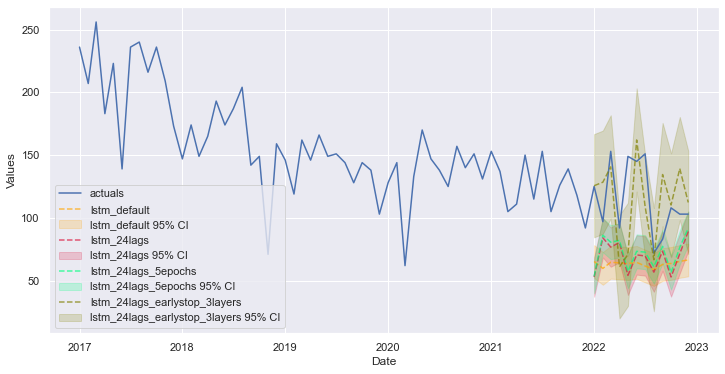

In [1184]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_24lags_earlystop_3layers',
                  lags=24,
                  epochs=25,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0))
f.plot_test_set(ci=True)

Epoch 1/15
1/1 [==============================] - 4s 4s/step - loss: 0.3617 - val_loss: 0.3645
Epoch 2/15
1/1 [==============================] - 0s 80ms/step - loss: 0.3358 - val_loss: 0.3297
Epoch 3/15
1/1 [==============================] - 0s 73ms/step - loss: 0.2998 - val_loss: 0.2746
Epoch 4/15
1/1 [==============================] - 0s 72ms/step - loss: 0.2469 - val_loss: 0.2005
Epoch 5/15
1/1 [==============================] - 0s 67ms/step - loss: 0.1826 - val_loss: 0.1823
Epoch 6/15
1/1 [==============================] - 0s 68ms/step - loss: 0.1547 - val_loss: 0.1828
Epoch 7/15
1/1 [==============================] - 0s 83ms/step - loss: 0.1504 - val_loss: 0.1434
Epoch 8/15
1/1 [==============================] - 0s 70ms/step - loss: 0.1110 - val_loss: 0.1218
Epoch 9/15
1/1 [==============================] - 0s 71ms/step - loss: 0.0924 - val_loss: 0.1265
Epoch 10/15
1/1 [==============================] - 0s 72ms/step - loss: 0.0967 - val_loss: 0.1241
Epoch 11/15
1/1 [==============

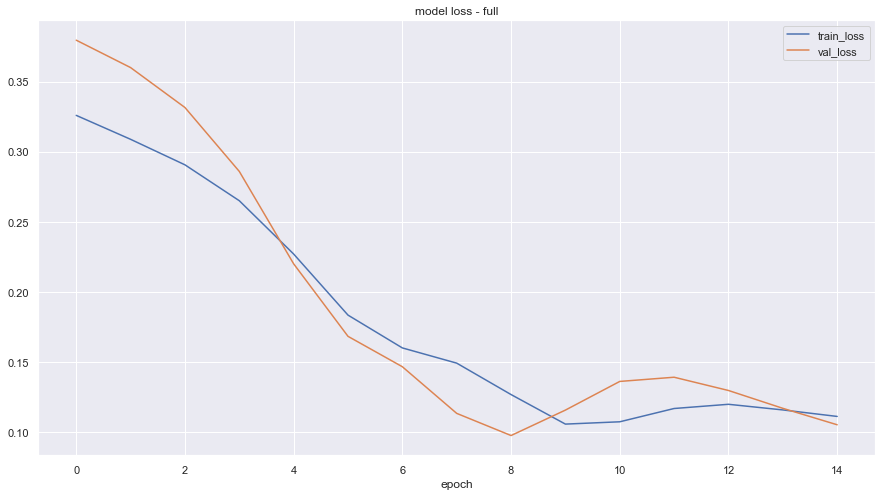

1/1 [==============================] - 0s 37ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

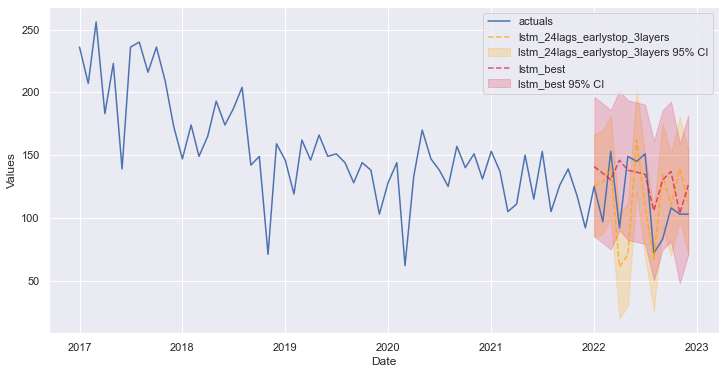

In [1185]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

In [1212]:
f.set_estimator('mlr') # 1. choose the mlr estimator
f.add_ar_terms(24) # 2. add regressors (24 lagged terms)
f.add_seasonal_regressors('month','quarter',dummy=True) # 2.
f.add_seasonal_regressors('year') # 2.
f.add_time_trend() # 2.
f.diff() # 3. difference non-stationary data

ForecastError: before adding regressors, please make sure you have generated future dates by calling generate_future_dates(), set_last_future_date(), or ingest_Xvars_df(use_future_dates=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

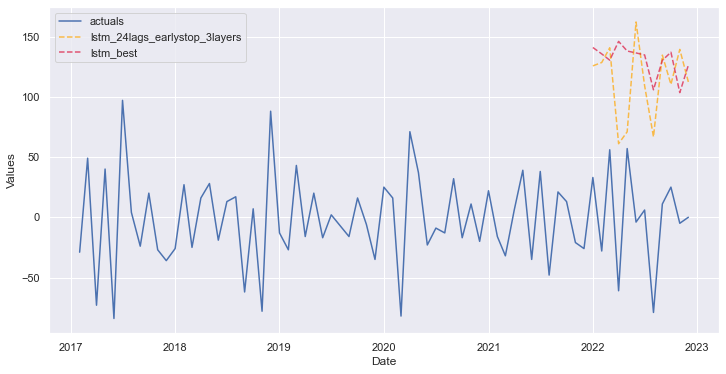

In [1187]:
f.manual_forecast()
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2')

<AxesSubplot:xlabel='Date', ylabel='Values'>

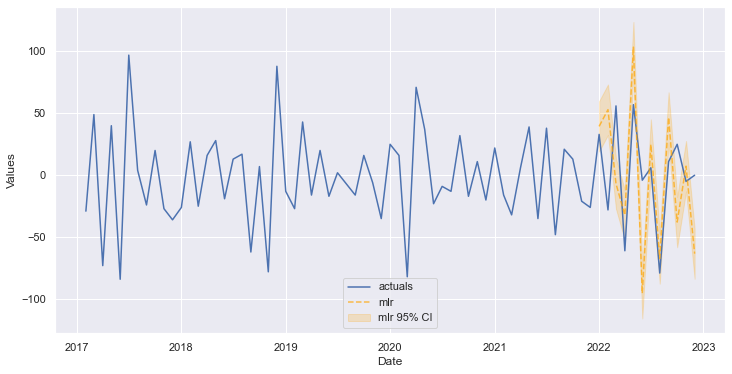

In [1188]:
f.plot_test_set(models='mlr',ci=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

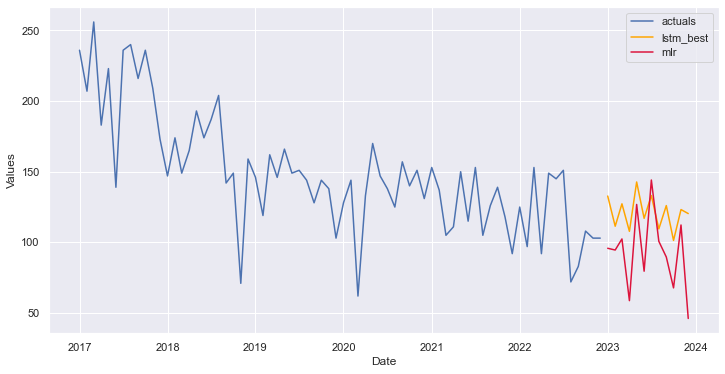

In [1189]:
f.plot(models=['mlr','lstm_best'],
       order_by='LevelTestSetMAPE',
       level=True)

Text(0.5, 1.0, 'test')

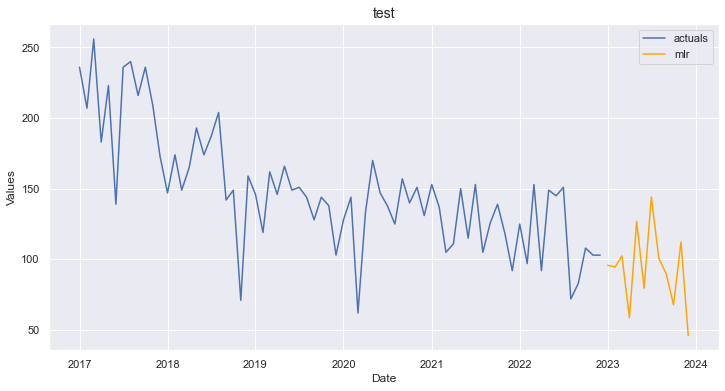

In [1196]:
f.plot(models=['mlr'],level=True)
plt.title('test',fontsize=14)

In [1202]:
item_df = sql_item("Rogan Josh")

In [1203]:
item_df.head()

item  sold       date
0  Rogan Josh    34 2017-01-01
1  Rogan Josh    29 2017-02-01
2  Rogan Josh    44 2017-03-01
3  Rogan Josh    32 2017-04-01
4  Rogan Josh    37 2017-05-01

In [1209]:
test5 = item_df
test5.info()
#test5['date'] = test5['date'].dt.to_timestamp()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   item    72 non-null     object        
 1   sold    72 non-null     int64         
 2   date    72 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.2+ KB


<AxesSubplot:xlabel='Date', ylabel='Values'>

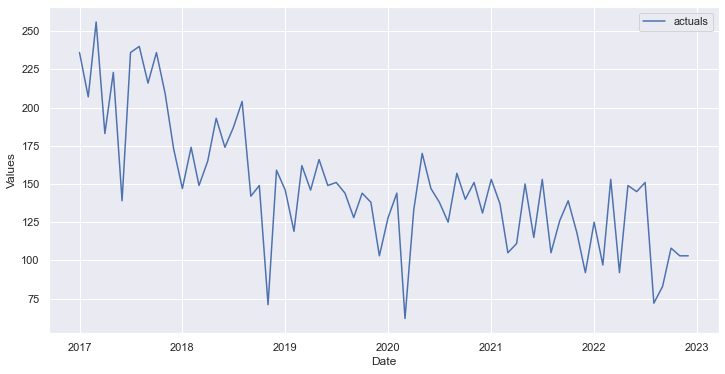

In [1211]:
f = Forecaster(y=test4['y'],
                   current_dates=test4['date'])
f.plot()


2/2 [==============================] - 0s 2ms/step
Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 0.3298 - val_loss: 0.3371
Epoch 2/5
1/1 [==============================] - 0s 18ms/step - loss: 0.3259 - val_loss: 0.3329
Epoch 3/5
1/1 [==============================] - 0s 23ms/step - loss: 0.3219 - val_loss: 0.3287
Epoch 4/5
1/1 [==============================] - 0s 20ms/step - loss: 0.3179 - val_loss: 0.3244
Epoch 5/5
1/1 [==============================] - 0s 171ms/step
Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 0.3270 - val_loss: 0.3549
Epoch 2/5
1/1 [==============================] - 0s 18ms/step - loss: 0.3231 - val_loss: 0.3509
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 0.3194 - val_loss: 0.3468
Epoch 4/5
1/1 [==============================] - 0s 19ms/step - loss: 0.3156 - val_loss: 0.3427
Epoch 5/5
2/2 [==============================] - 0s 3ms/step
Epoch 1/25
1/1 [==============================] - 3s 3s/step 

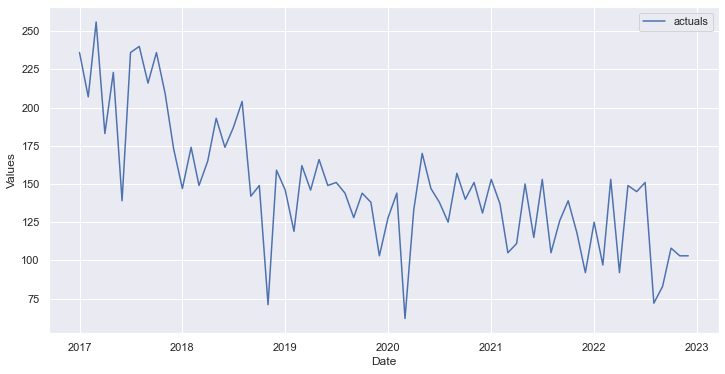

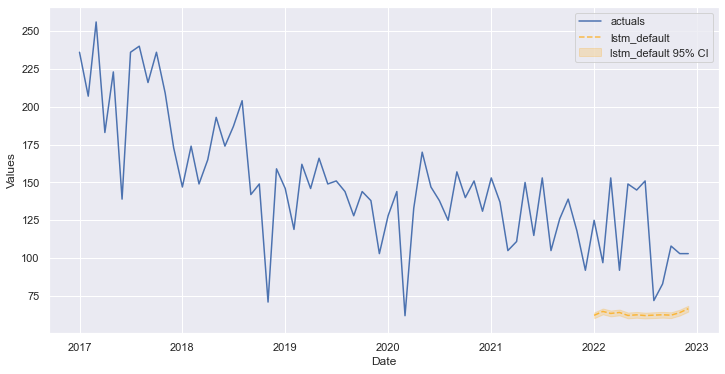

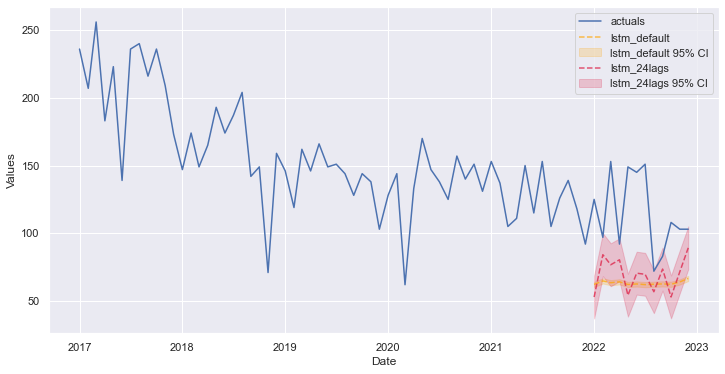

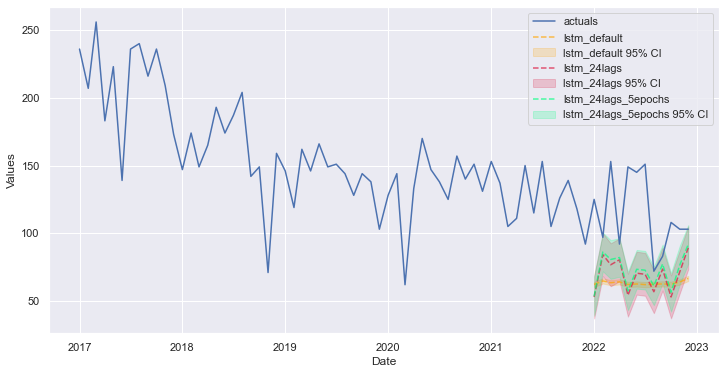

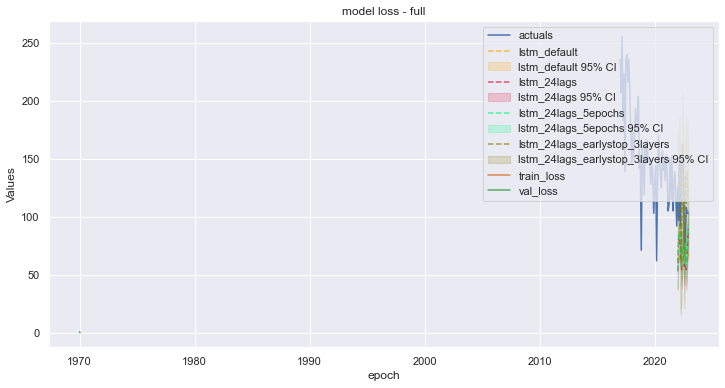

1/1 [==============================] - 0s 31ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

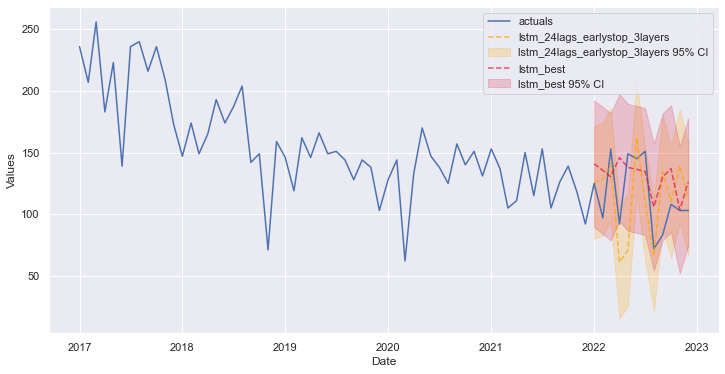

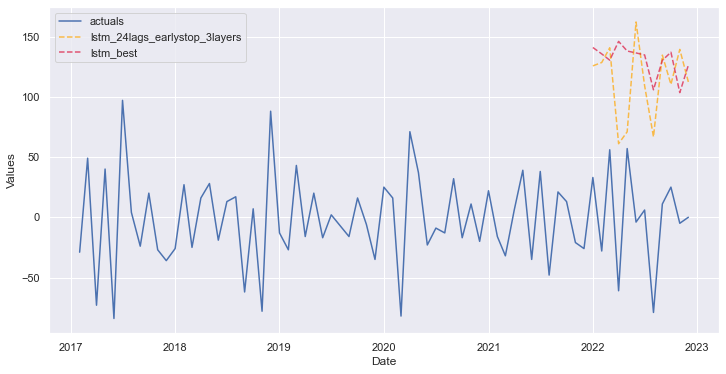

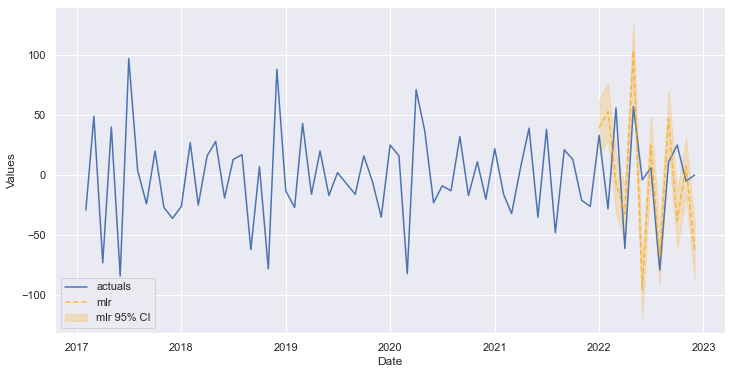

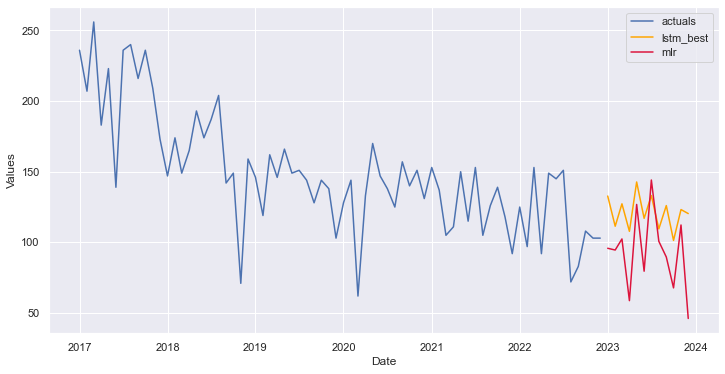